## Configure sweep on 10 MW turbine with specified shear/veer rates

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle
import numpy as np
from wrf_io import *
from scipy.io import savemat
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
fontsize = 24
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 

plt.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

In [ ]:
opt_params={}

opt_params['allocation']      = 'ATM170028' 
opt_params['partition']       = 'spr' 
opt_params['runtime']         = '12:00:00'
opt_params['system']          = 'stampede'
opt_params['num_nodes']       = 2
 
opt_params['exclude_time']    = 7
opt_params['save_interval']   = 10
 
opt_params['base_dir']        = '/home1/09909/smata/dir_scratch/wrf_les_sweep/runs/10MW/rate/irrotational_gad'

opt_params['wrf_path']        = '/work2/09909/smata/stampede3/WRF_LES'
opt_params['template_path']   = '/scratch/09909/smata/wrf_les_sweep/templates'
opt_params['turb_model']      = 'iea10MW'
opt_params['rotor_model']     = 'GAD'
opt_params['slice_loc']       = 1
    
opt_params['print_table']     = True
    
opt_params['plot_outer']      = True
opt_params['save_outer']      = False
opt_params['outer_align']     = False
    
opt_params['plot_inner']      = True
opt_params['save_inner']      = False
    
opt_params['save_both']       = False
opt_params['outer_pad']       = 75
 
opt_params['plot_profiles']   = True
opt_params['save_profiles']   = True
 
opt_params['batch_submit']    = True
 
opt_params['prof_type']       = 'Idealized'
opt_params['shear_type']      = 'Rate'
 
# Train 
opt_params['shear']           = [-0.025,-0.015,0,0.015,0.025]
opt_params['veer']            = [-0.2,-0.13,-0.067,0,0.067,0.13,0.2]
 
opt_params['Ufst']            = 7
 
opt_params['excluded_pairs']  = []

# with open('/scratch/09909/smata/wrf_les_sweep/runs/10MW/rate/train/gad_sweep/opt_params.pkl', 'wb') as f:
#     pickle.dump(opt_params, f)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Parameter                                 ┃                  Value ┃ Issue ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ TIME CONTROL AND SETUP                    │                        │       │
│                                           │                        │       │
│ Run time                                  │            00:00:09:00 │       │
│                                           │                        │       │
│ Outer dt                                  │               0.40 sec │       │
│ Inner dt                                  │               0.04 sec │       │
│                                           │                        │       │
│ Processes                                 │                     77 │       │
├───────────────────────────────────────────┼────────────────────────┼───────┤
│ TURBINE                                   │                        │       │
│                                           │                        │       │
│ Model                                     │                iea10MW │       │
│ Diameter                                  │               199.00 m │       │
│ Hub diameter                              │                 4.80 m │       │
│ Inner domain x location                   │               2.01 x D │       │
│ Turbine x location                        │               4.22 x D │       │
│ z location                                │                378.0 m │       │
├───────────────────────────────────────────┼────────────────────────┼───────┤
│ ROTOR                                     │                        │       │
│                                           │                        │       │
│ Model                                     │                    GAD │       │
│ Rotation                                  │              clockwise │       │
│ Sections                                  │                    160 │       │
│ Elements                                  │                     30 │       │
│                                           │                        │       │
│ nSeries                                   │                   4800 │       │
│                                           │                        │       │
│ V0 location                               │                0.8 x D │   >3D │
│                                           │                        │       │
│ Shapiro                                   │                     ON │       │
├───────────────────────────────────────────┼────────────────────────┼───────┤
│ DOMAIN                                    │                        │       │
│                                           │                        │       │
│ Outer mesh size                           │              4,172,157 │       │
│ Inner mesh Size                           │             10,373,077 │       │
│ Mesh ratio                                │                   2.49 │       │
│                                           │                        │       │
│ Outer dx, dy                              │         [40.0, 40.0] m │       │
│ Inner dx, dy                              │         [ 4.0,  4.0] m │       │
│ dz                                        │                 4.04 m │       │
│                                           │                        │       │
│ Outer [Lx, Ly, Lz]                        │ [40.4, 22.3,  3.8] x D │       │
│ Inner [Lx, Ly, Lz]                        │ [ 4.4,  5.0,  3.8] x D │       │
│                                           │                        │       │
│ Outer [Nx, Ny, Nz]                        │     [ 201,  111,  187] │       │
│ Inner [Nx, Ny, Nz]                        │     [ 221,  251,  187] │       │
│                                           │                        │       │
│ Lateral blockage                          │     

s00_vn20
s00_vn15
s00_vn10
s00_vn05
s00_v00
s00_v05
s00_v10
s00_v15
s00_v20
Done.


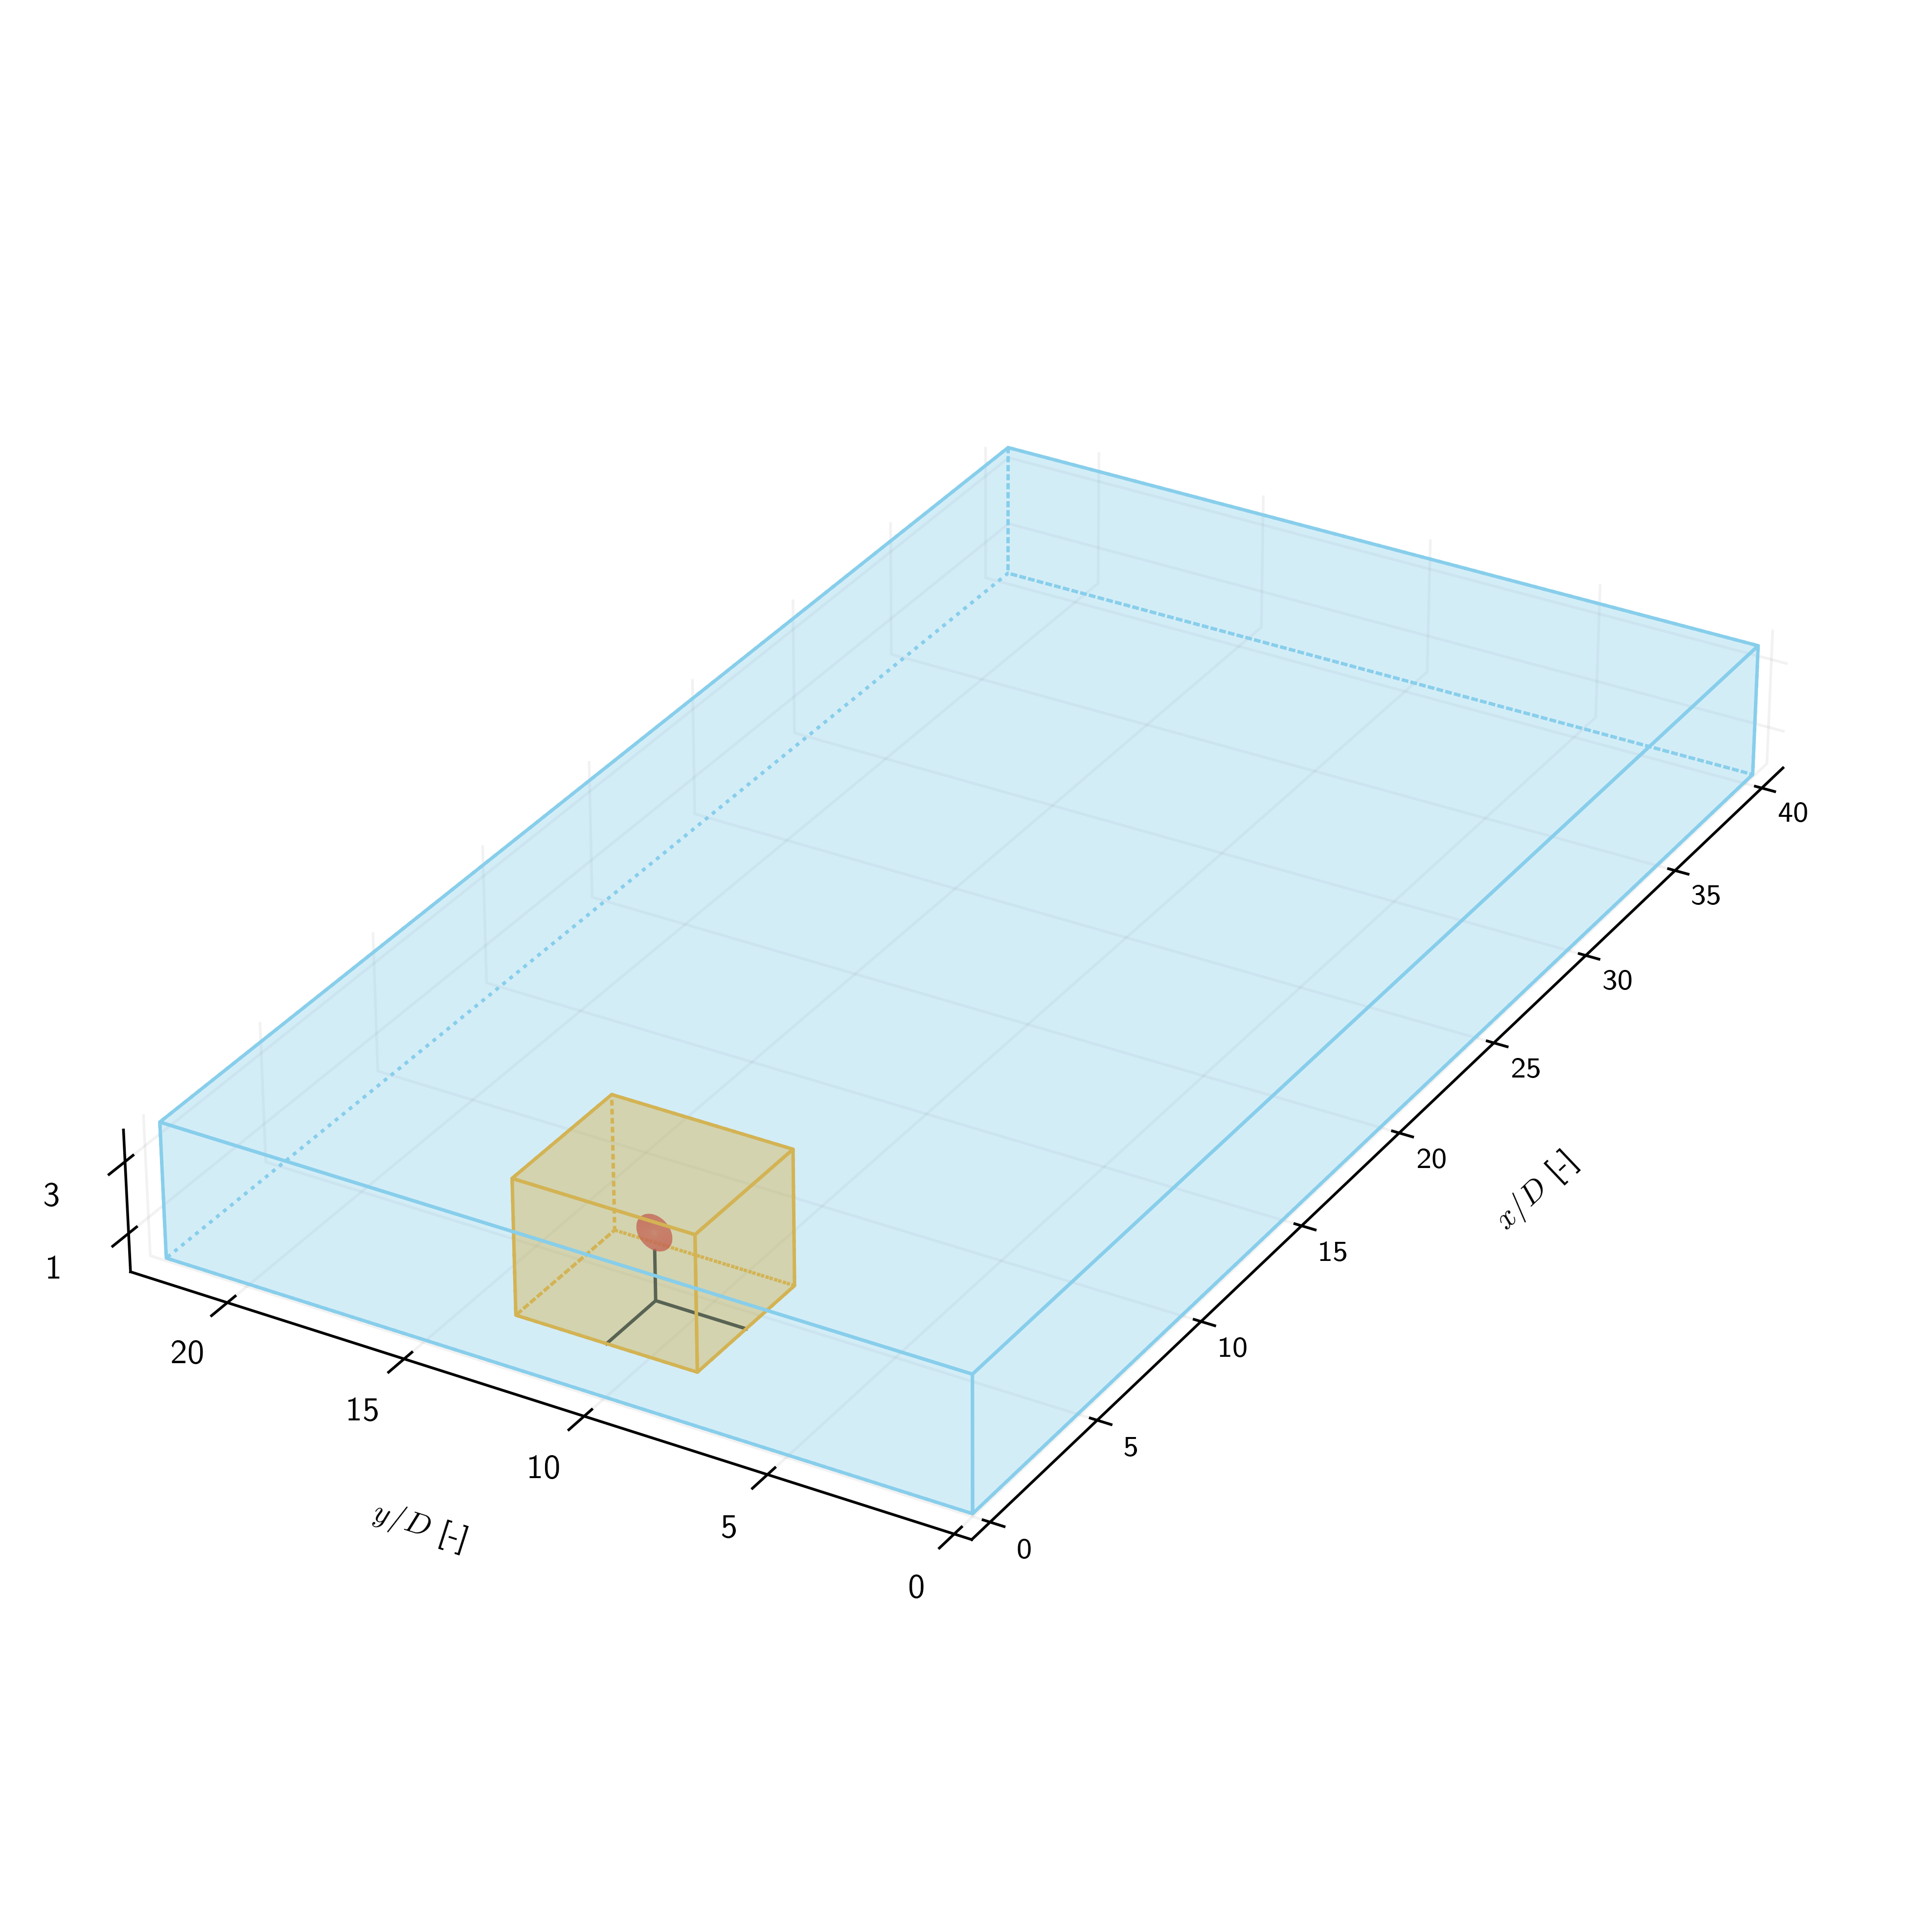

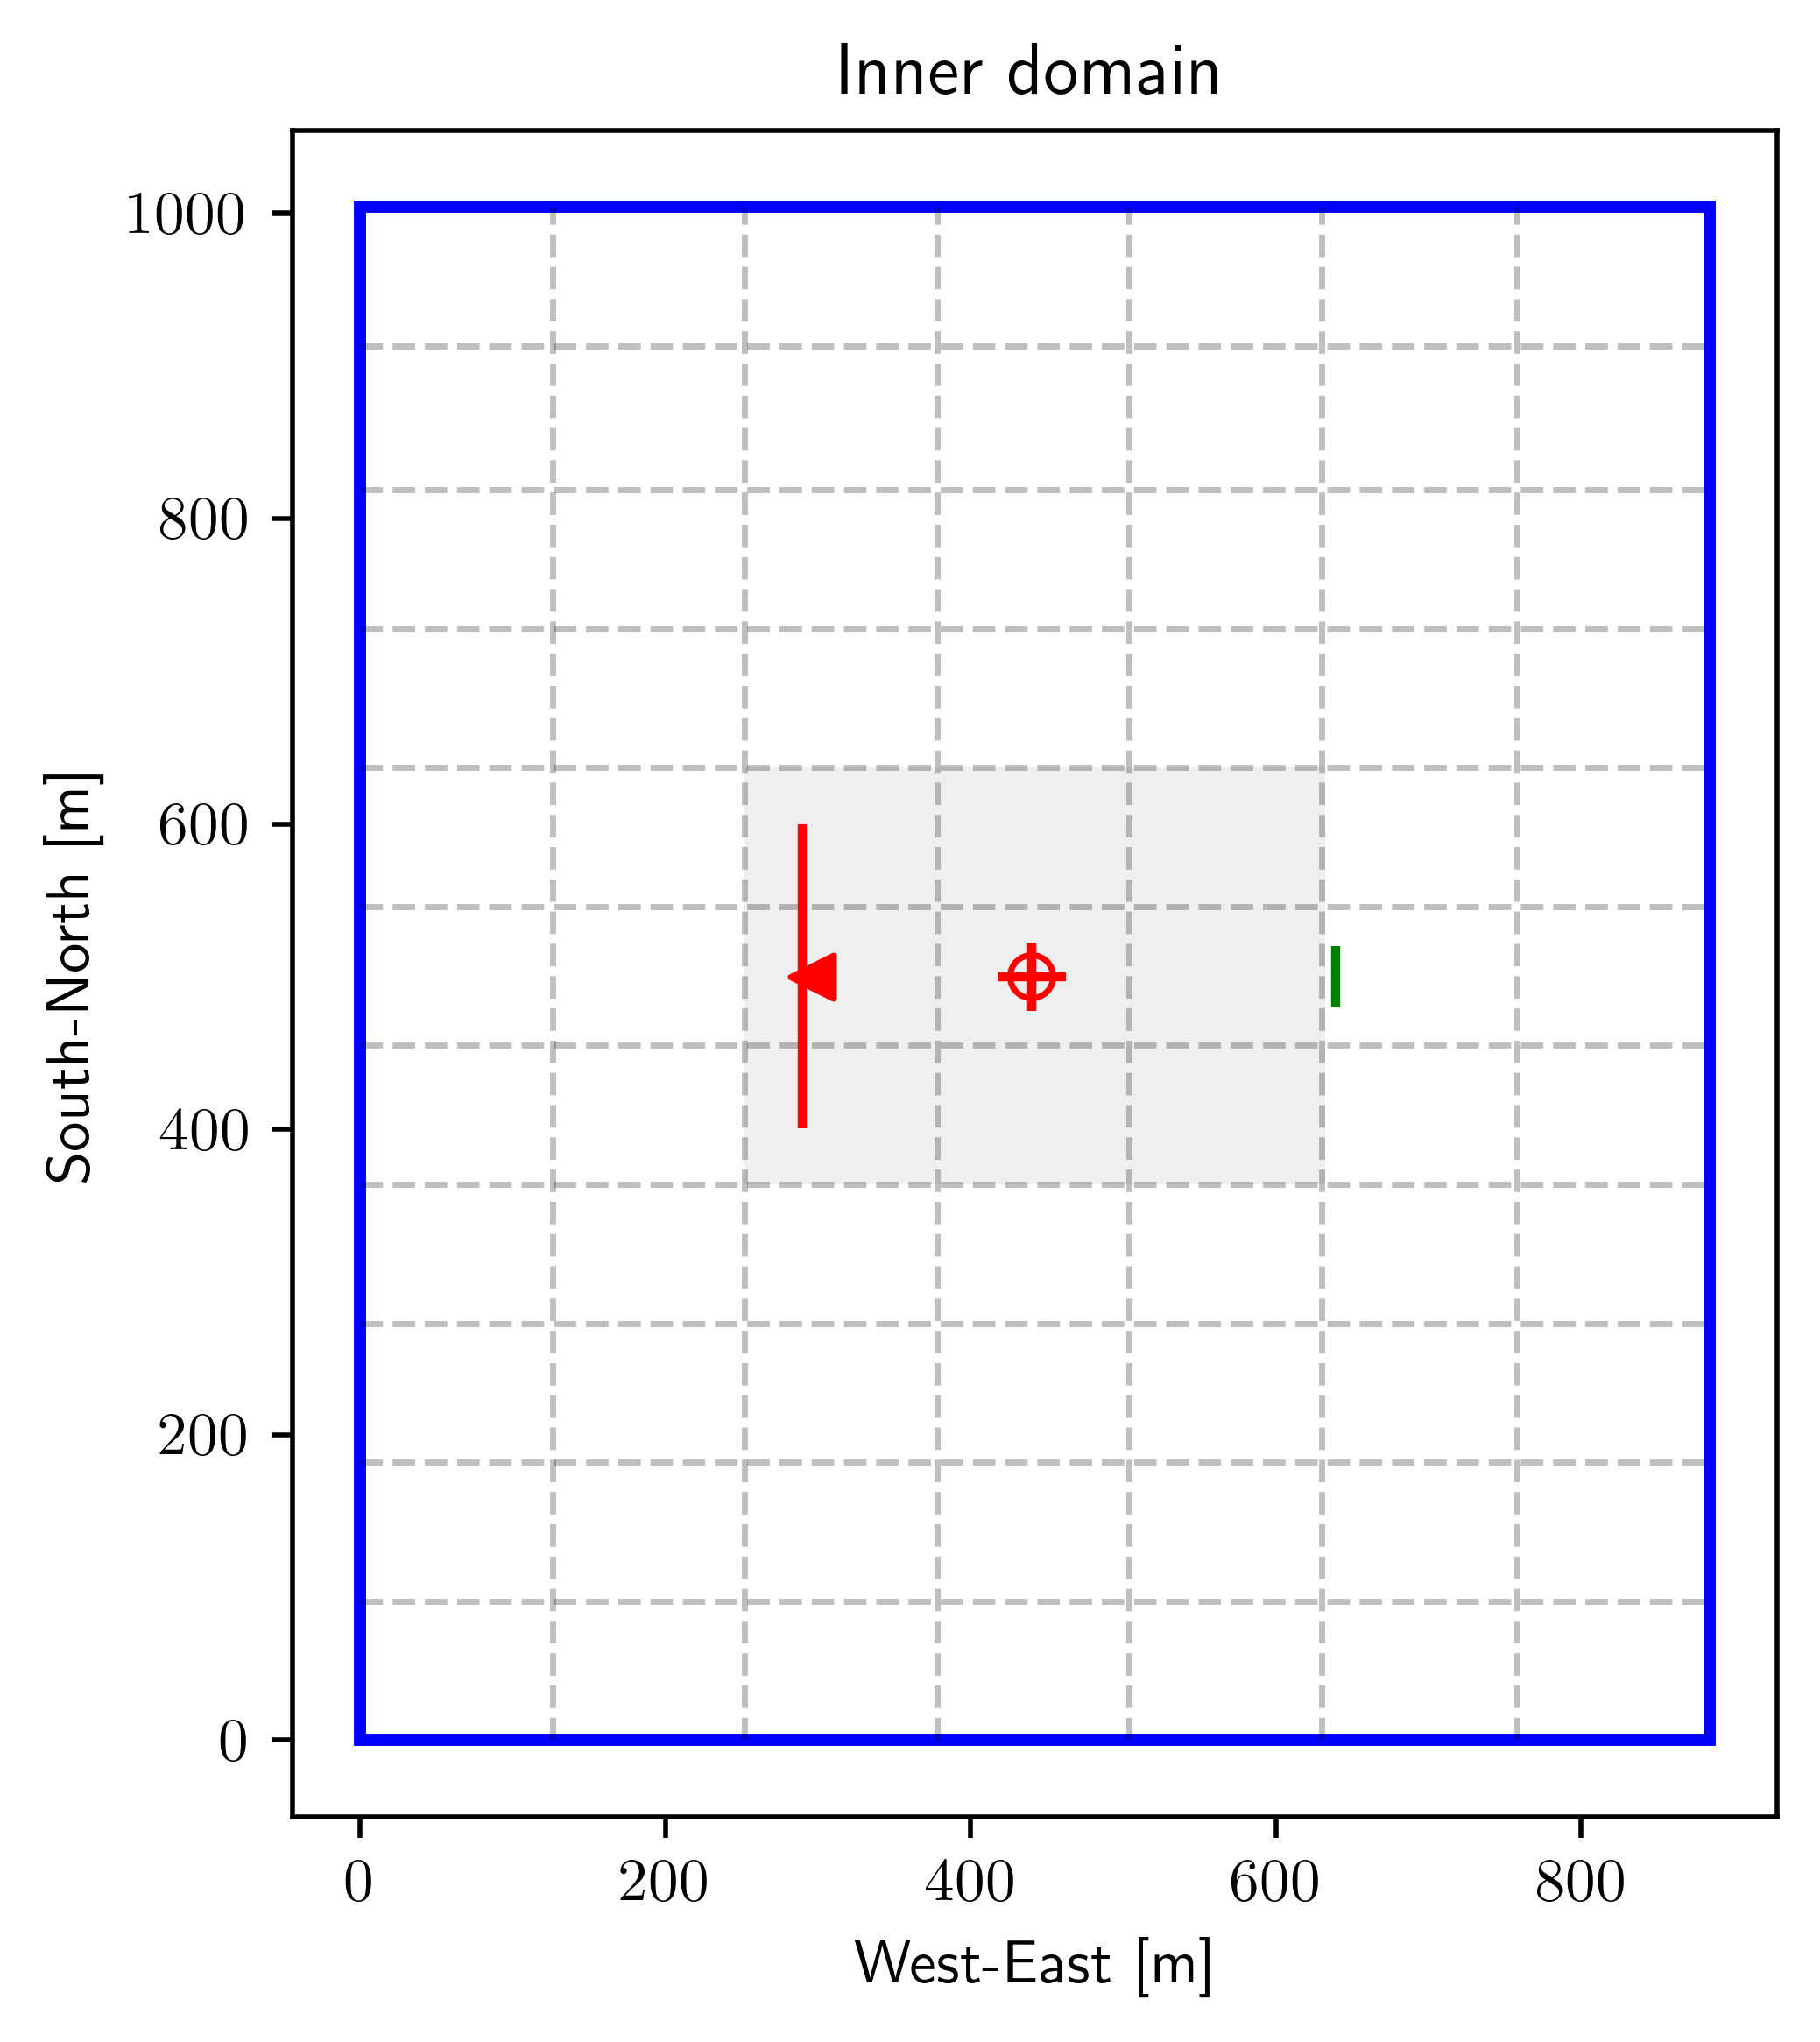

In [7]:
flag = sweep.setup(opt_params, 'GAD')

In [ ]:
postproc.convergence(opt_params)

In [4]:
postproc.parproc(5, opt_params, 'fast')

Preparing to process these files:

 1. s000_v000/wrfout_d02_0001-01-01_00_00_00
 2. s000_v067/wrfout_d02_0001-01-01_00_00_00
 3. s000_v130/wrfout_d02_0001-01-01_00_00_00
 4. s000_v200/wrfout_d02_0001-01-01_00_00_00
 5. s000_vn067/wrfout_d02_0001-01-01_00_00_00
 6. s000_vn130/wrfout_d02_0001-01-01_00_00_00
 7. s000_vn200/wrfout_d02_0001-01-01_00_00_00
 8. s015_v000/wrfout_d02_0001-01-01_00_00_00
 9. s015_v067/wrfout_d02_0001-01-01_00_00_00
10. s015_v130/wrfout_d02_0001-01-01_00_00_00
11. s015_v200/wrfout_d02_0001-01-01_00_00_00
12. s015_vn067/wrfout_d02_0001-01-01_00_00_00
13. s015_vn130/wrfout_d02_0001-01-01_00_00_00
14. s015_vn200/wrfout_d02_0001-01-01_00_00_00
15. s025_v000/wrfout_d02_0001-01-01_00_00_00
16. s025_v067/wrfout_d02_0001-01-01_00_00_00
17. s025_v130/wrfout_d02_0001-01-01_00_00_00
18. s025_v200/wrfout_d02_0001-01-01_00_00_00
19. s025_vn067/wrfout_d02_0001-01-01_00_00_00
20. s025_vn130/wrfout_d02_0001-01-01_00_00_00
21. s025_vn200/wrfout_d02_0001-01-01_00_00_00
22. sn015_v000/wrfout_d02_0001-01-01_00_00_00
23. sn015_v067/wrfout_d02_0001-01-01_00_00_00
24. sn015_v130/wrfout_d02_0001-01-01_00_00_00
25. sn015_v200/wrfout_d02_0001-01-01_00_00_00
26. sn015_vn067/wrfout_d02_0001-01-01_00_00_00
27. sn015_vn130/wrfout_d02_0001-01-01_00_00_00
28. sn015_vn200/wrfout_d02_0001-01-01_00_00_00
29. sn025_v000/wrfout_d02_0001-01-01_00_00_00
30. sn025_v067/wrfout_d02_0001-01-01_00_00_00
31. sn025_v130/wrfout_d02_0001-01-01_00_00_00
32. sn025_v200/wrfout_d02_0001-01-01_00_00_00
33. sn025_vn067/wrfout_d02_0001-01-01_00_00_00
34. sn025_vn130/wrfout_d02_0001-01-01_00_00_00
35. sn025_vn200/wrfout_d02_0001-01-01_00_00_00

Processing WRF outputs with 5 parallel processes...


Working on s000_vn067...
Working on s000_v000...
Working on s000_vn200...
Working on s015_v067...
Working on s000_v130...







Working on s015_v000...
Working on s000_v067...


Working on s015_v130...
Working on s000_v200...


Working on s000_vn130...

Working on s015_v200...

Working on s015_vn130...

Working on s025_v000...

Working on s025_v130...

Working on s025_vn067...

Working on s025_v067...

Working on s015_vn067...

Working on s015_vn200...

Working on s025_v200...

Working on s025_vn130...

Working on s025_vn200...

Working on sn015_v067...

Working on sn015_v200...

Working on sn015_vn130...

Working on sn025_v000...

Working on sn015_v130...

Working on sn015_v000...

Working on sn015_vn067...

Working on sn015_vn200...

Working on sn025_v067...

Working on sn025_v130...

Working on sn025_vn067...

Working on sn025_vn200...

Working on sn025_vn130...

Working on sn025_v200...


Finished in 0 min and 5 sec.

In [5]:
train_data = gpr.generate_train_data(opt_params, D=199, field_data = True)

allocation      : ATM170028
partition       : spr
runtime         : 12:00:00
system          : stampede
num_nodes       : 2
exclude_time    : 7
save_interval   : 10
base_dir        : /scratch/09909/smata/wrf_les_sweep/runs/10MW/rate/train
gp_dir          : /scratch/09909/smata/induction_modeling/gaussian_process/10MW/train_data/
field_data_path : /scratch/09909/smata/induction_modeling/gaussian_process/10MW/train_data/processedData/
wrf_path        : /work2/09909/smata/stampede3/WRF_LES
template_path   : /scratch/09909/smata/wrf_les_sweep/templates
turb_model      : iea10MW
rotor_model     : GAD
slice_loc       : 1
print_table     : True
plot_outer      : True
save_outer      : False
outer_align     : False
plot_inner      : True
save_inner      : False
save_both       : False
outer_pad       : 75
plot_profiles   : True
save_profiles   : True
batch_submit    : True
prof_type       : Idealized
shear_type      : Rate
shear           : [-0.025, -0.015, 0, 0.015, 0.025]
veer            : [

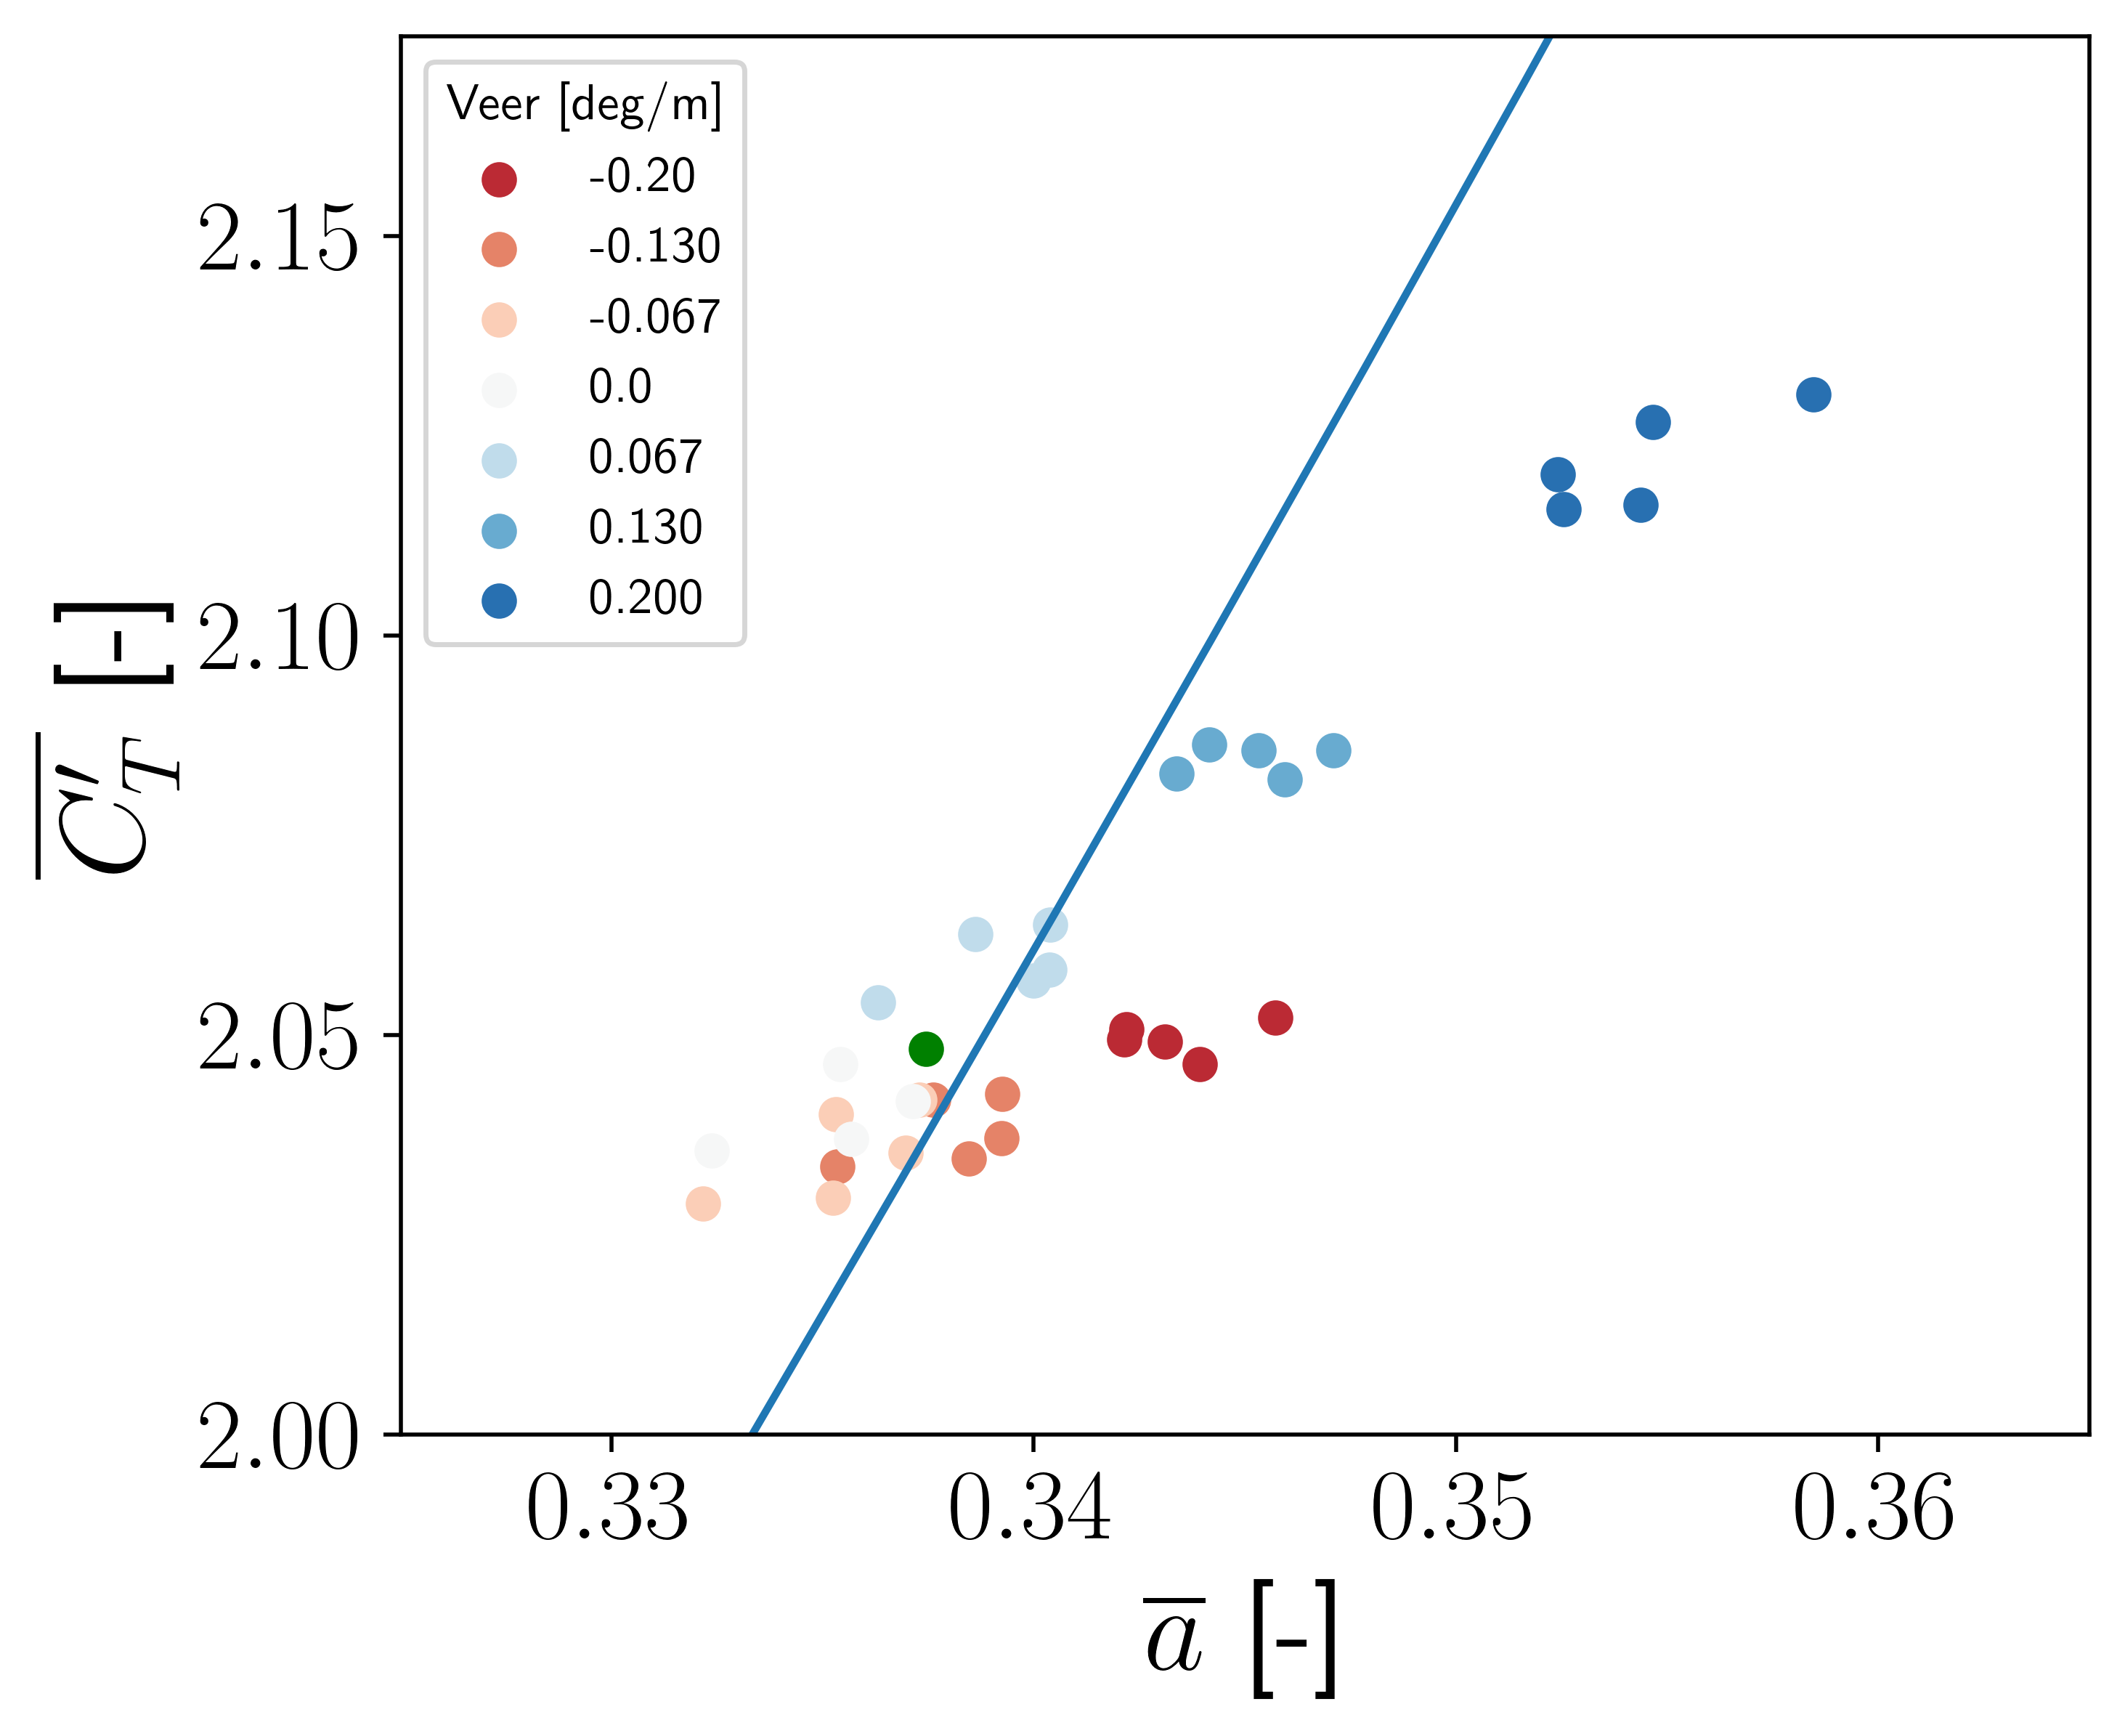

In [8]:
fig, ax = plt.subplots(figsize=(6, 5))


a = np.linspace(0.30,0.37,20)
CT_formula = 4 * a / (1 - a)

veer_n200 = [0,7,14,21,28]
veer_n130 = [1,8,15,22,29]
veer_n067 = [2,9,16,23,30]
veer_000  = [3,10,17,24,31]
veer_067  = [4,11,18,25,32]
veer_130  = [5,12,19,26,33]
veer_200  = [6,13,20,27,34]

uniform = 17

ax.plot(a,CT_formula)

ax.scatter(train_data['ind_rotor'][veer_n200], train_data['cotp_rotor'][veer_n200],color=veer_pallette[0],label='-0.20')
ax.scatter(train_data['ind_rotor'][veer_n130], train_data['cotp_rotor'][veer_n130],color=veer_pallette[1],label='-0.130')
ax.scatter(train_data['ind_rotor'][veer_n067], train_data['cotp_rotor'][veer_n067],color=veer_pallette[2],label='-0.067')
ax.scatter(train_data['ind_rotor'][veer_000],  train_data['cotp_rotor'][veer_000], color=veer_pallette[3],label='0.0')
ax.scatter(train_data['ind_rotor'][veer_067],  train_data['cotp_rotor'][veer_067], color=veer_pallette[4],label='0.067')
ax.scatter(train_data['ind_rotor'][veer_130],  train_data['cotp_rotor'][veer_130], color=veer_pallette[5],label='0.130')
ax.scatter(train_data['ind_rotor'][veer_200],  train_data['cotp_rotor'][veer_200], color=veer_pallette[6],label='0.200')
ax.scatter(train_data['ind_rotor'][uniform], train_data['cotp_rotor'][uniform],color='green',label='')

ax.set_xlabel('$\overline{a}$ [-]', fontsize=fontsize)
ax.set_ylabel('$\overline{C_T\'}$ [-]', fontsize=fontsize)

ax.set_xlim([0.325,0.365])
ax.set_ylim([2.0,2.175])

ax.legend(title='Veer [deg/m]')

In [9]:
rotor_data = gpr.generate_train_data(opt_params, D=199, rotor_data=True)

allocation      : ATM170028
partition       : spr
runtime         : 12:00:00
system          : stampede
num_nodes       : 2
exclude_time    : 7
save_interval   : 10
base_dir        : /scratch/09909/smata/wrf_les_sweep/runs/10MW/rate/train
gp_dir          : /scratch/09909/smata/induction_modeling/gaussian_process/10MW/train_data/
field_data_path : /scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/
wrf_path        : /work2/09909/smata/stampede3/WRF_LES
template_path   : /scratch/09909/smata/wrf_les_sweep/templates
turb_model      : iea10MW
rotor_model     : GAD
slice_loc       : 1
print_table     : True
plot_outer      : True
save_outer      : False
outer_align     : False
plot_inner      : True
save_inner      : False
save_both       : False
outer_pad       : 75
plot_profiles   : True
save_profiles   : True
batch_submit    : True
prof_type       : Idealized
shear_type      : Rate
shear           : [-0.025, -0.015, 0, 0.015, 0.025]
veer            : [-0.

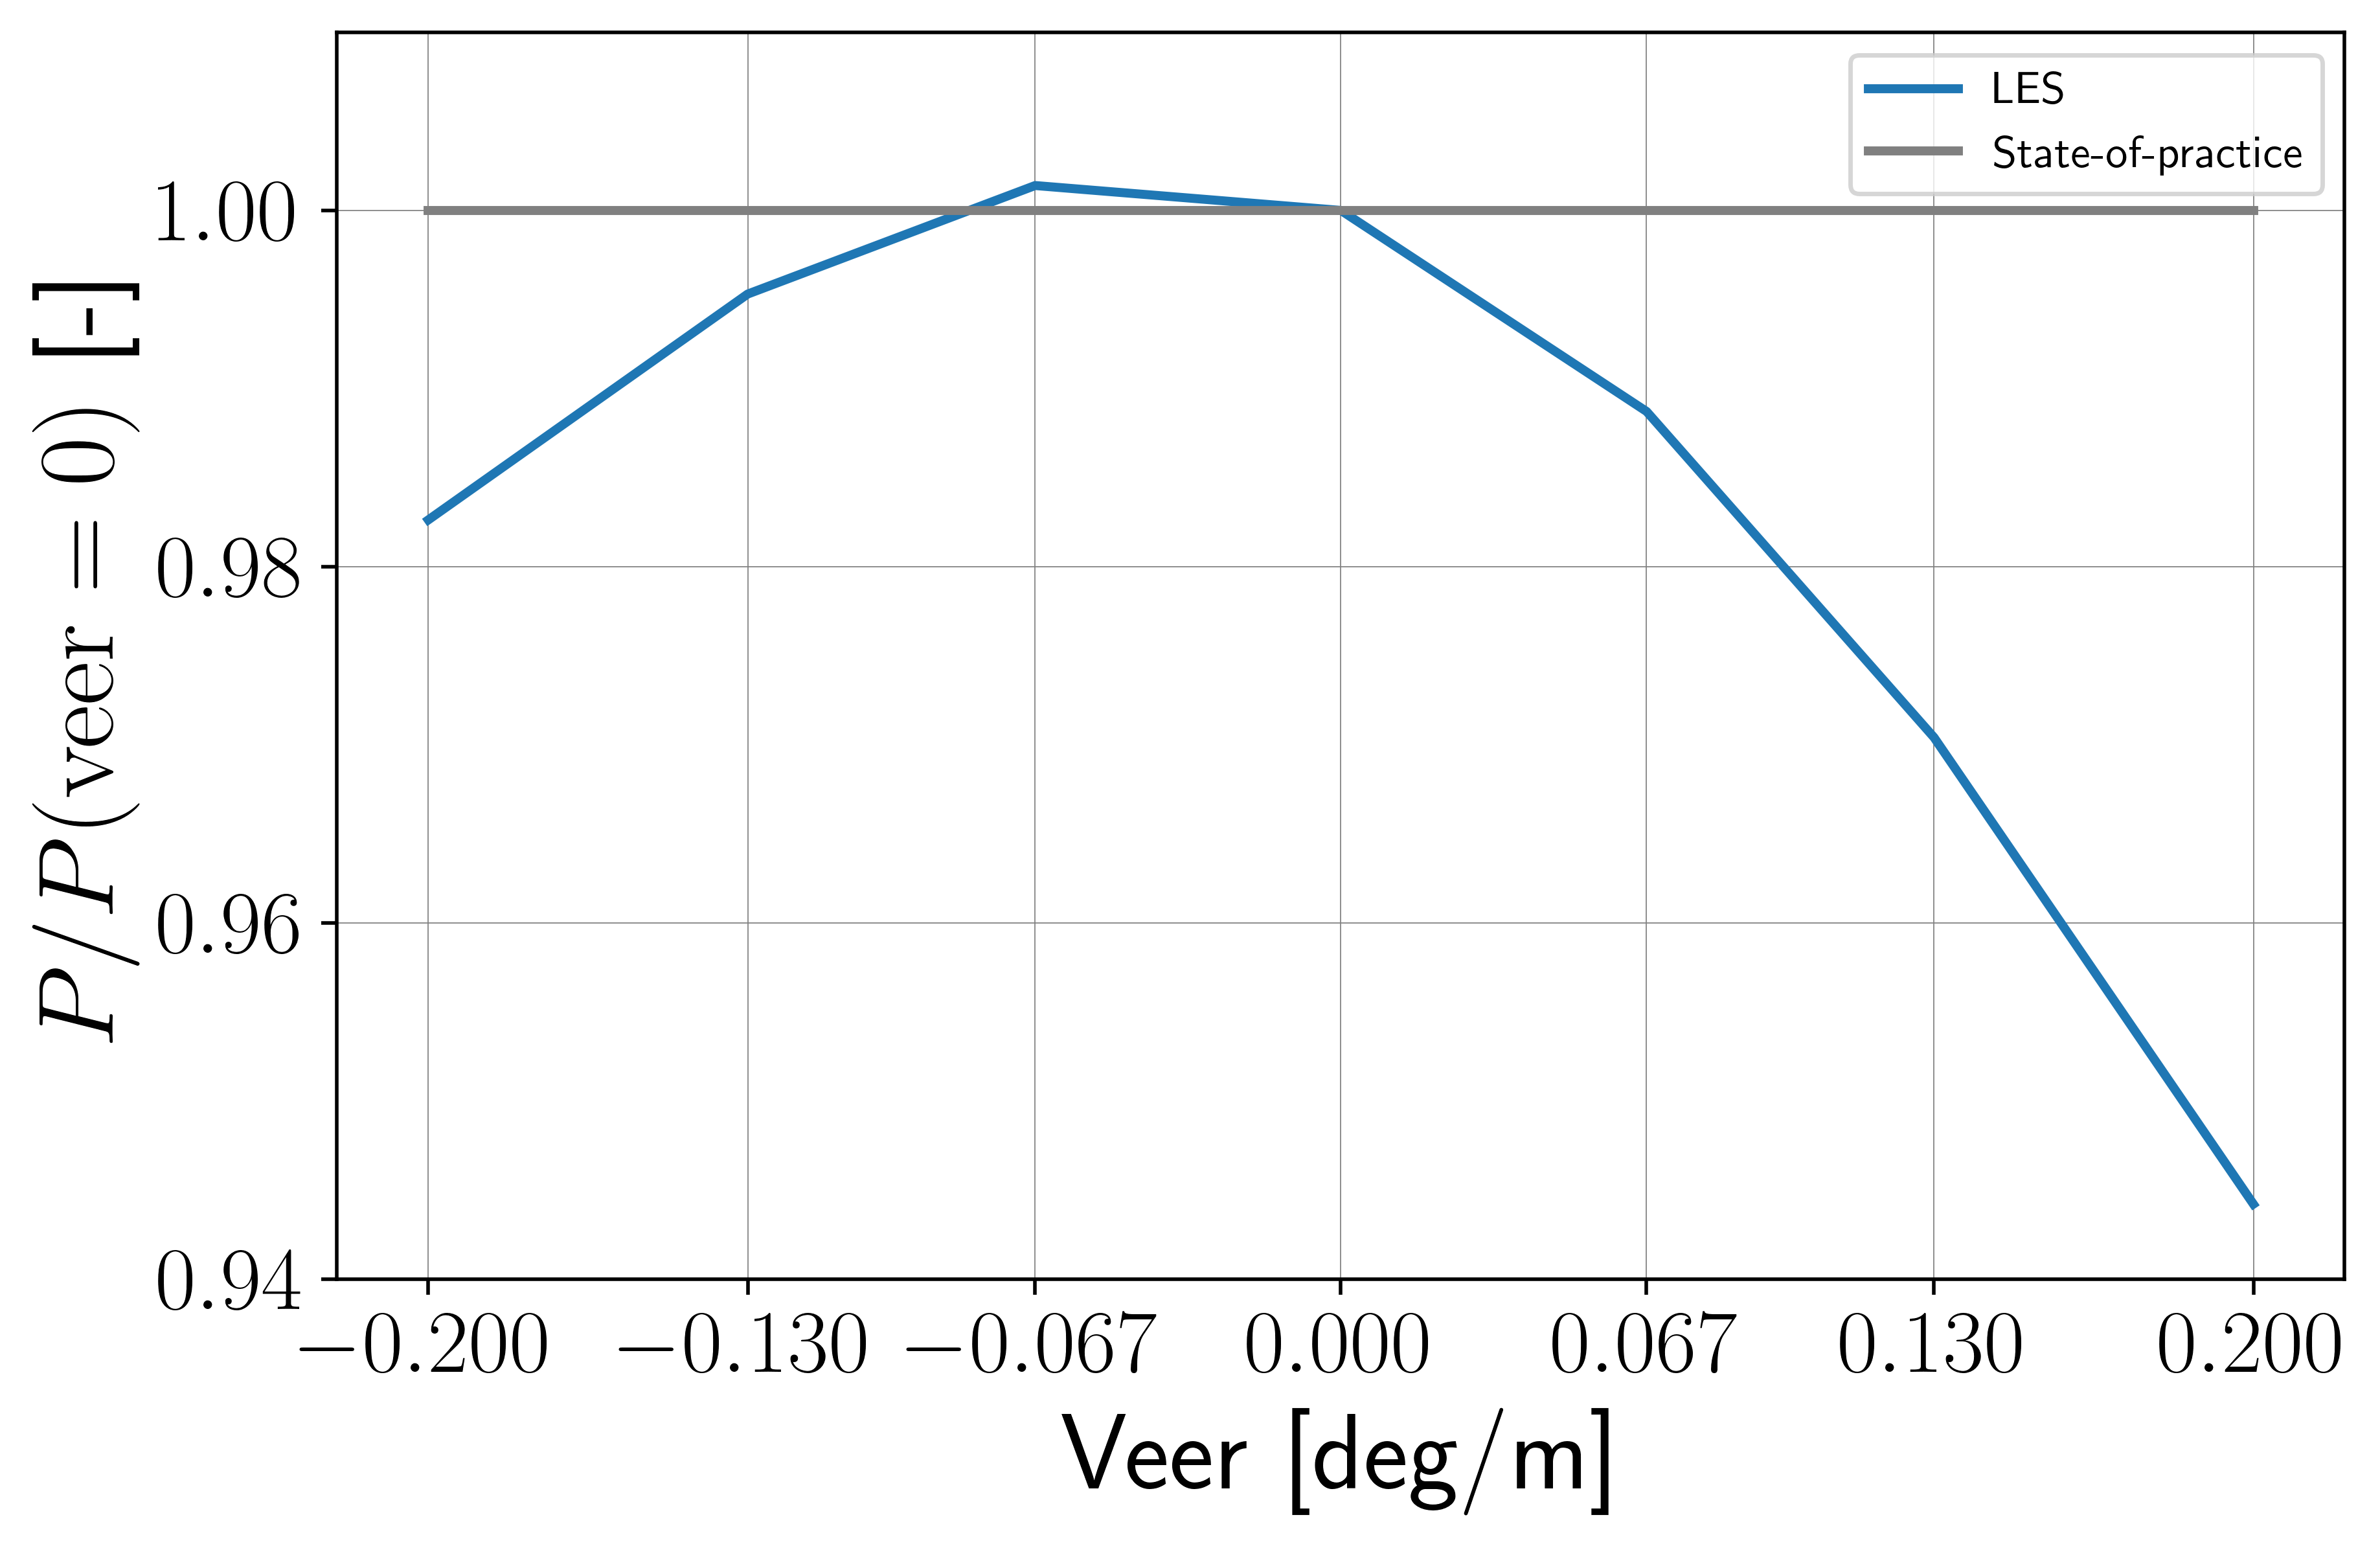

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))

veer_train = [-0.2,-0.13,-0.067,0.0,0.067,0.13,0.2] 

uniform = 17
shear_000  = [14,15,16,17,18,19,20]

# ax.plot(veer_train,rotor_data['power'][shear_000],linestyle='-',label='LES', linewidth=2)

ax.plot(veer_train,rotor_data['power'][shear_000]/rotor_data['power'][uniform],linestyle='-',label='LES', linewidth=2)
ax.plot([veer_train[0], veer_train[-1]],[1,1],linestyle='-', color='grey', label='State-of-practice', linewidth=2)

# ax.axhline(1, color='grey', linestyle='--', linewidth=0.25)  # horizontal dashed grey line

ax.grid(True,color = "grey", linewidth = "0.25")

ax.set_ylabel('$P/P(\\textrm{veer}=0)$ [-]', fontsize=fontsize)
ax.set_xlabel('Veer [deg/m]', fontsize=fontsize)

ax.legend()

ax.set_ylim([0.94,1.01])

ax.set_xticks(veer_train)

plt.show()

In [7]:
import seaborn as sns
veer_pallette  = sns.color_palette("RdBu", as_cmap=False, n_colors=7)
shear_pallette = sns.color_palette("PRGn", as_cmap=False, n_colors=5)

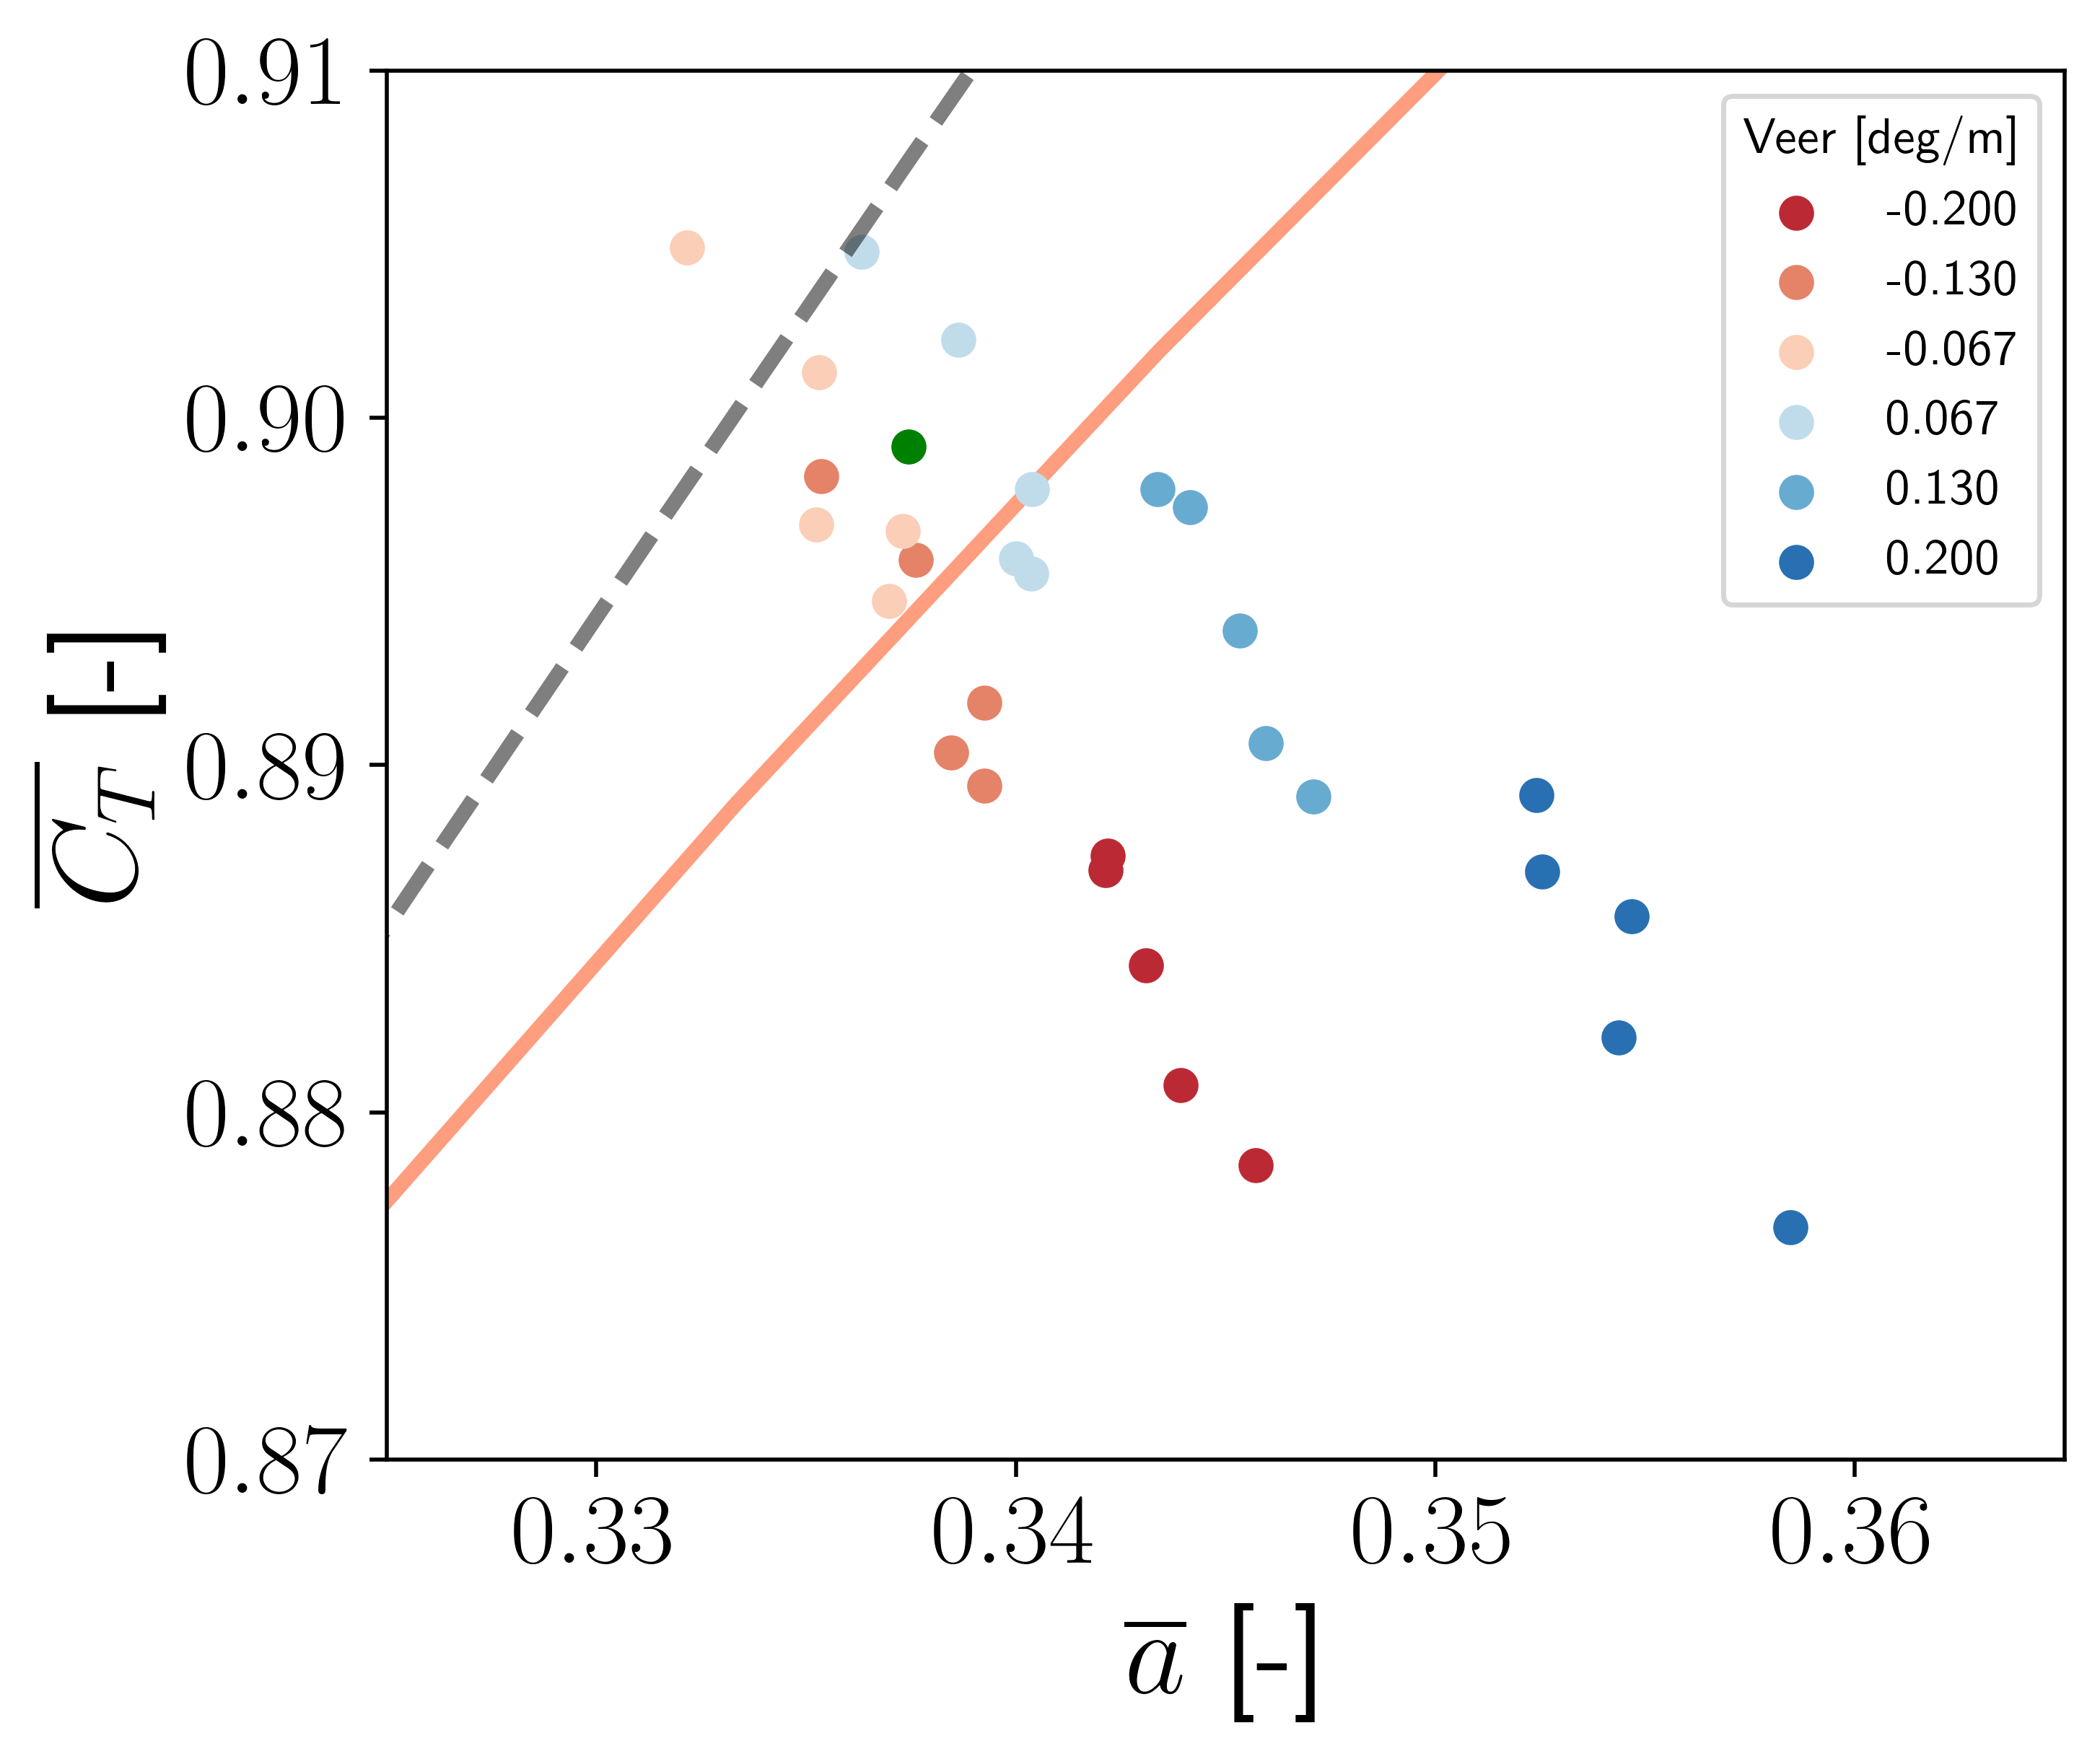

In [11]:
fig, ax = plt.subplots(figsize=(6, 5))

a_mad, ct_mad = postproc.madsen_ref()
a_mom, ct_mom = postproc.classical_ref()

veer_n200 = [0,7,14,21,28]
veer_n130 = [1,8,15,22,29]
veer_n067 = [2,9,16,23,30]
veer_000  = [3,10,17,24,31]
veer_067  = [4,11,18,25,32]
veer_130  = [5,12,19,26,33]
veer_200  = [6,13,20,27,34]

shear_n025 = [ 0, 1, 2, 3, 4, 5, 6]
shear_n015 = [ 7, 8, 9,10,11,12,13]
shear_000  = [14,15,16,17,18,19,20]
shear_015  = [21,22,23,24,25,26,27]
shear_025  = [28,29,30,31,32,33,34]

uniform = 17

ax.plot(a_mom, ct_mom, '#ff3c00',linewidth=3,alpha = 0.5, zorder = 1)
ax.plot(a_mad, ct_mad, 'k--',linewidth=3,alpha=0.5,zorder=2)

# ax.scatter(train_data['ind_rotor'], train_data['cot_rotor'])


ax.scatter(train_data['ind_rotor'][uniform], train_data['cot_rotor'][uniform],color='green',label='')
ax.scatter(train_data['ind_rotor'][veer_n200], train_data['cot_rotor'][veer_n200],color=veer_pallette[0],label='-0.200')
ax.scatter(train_data['ind_rotor'][veer_n130], train_data['cot_rotor'][veer_n130],color=veer_pallette[1],label='-0.130')
ax.scatter(train_data['ind_rotor'][veer_n067], train_data['cot_rotor'][veer_n067],color=veer_pallette[2],label='-0.067')
ax.scatter(train_data['ind_rotor'][veer_067],  train_data['cot_rotor'][veer_067], color=veer_pallette[4],label='0.067')
ax.scatter(train_data['ind_rotor'][veer_130],  train_data['cot_rotor'][veer_130], color=veer_pallette[5],label='0.130')
ax.scatter(train_data['ind_rotor'][veer_200],  train_data['cot_rotor'][veer_200], color=veer_pallette[6],label='0.200')
plt.legend(title='Veer [deg/m]')

# ax.scatter(train_data['ind_rotor'][uniform], train_data['cot_rotor'][uniform],color='green',label='')
# ax.scatter(train_data['ind_rotor'][shear_n025], train_data['cot_rotor'][shear_n025],color=shear_pallette[0],label='-0.025')
# ax.scatter(train_data['ind_rotor'][shear_n015], train_data['cot_rotor'][shear_n015],color=shear_pallette[1],label='-0.015')
# ax.scatter(train_data['ind_rotor'][shear_000],  train_data['cot_rotor'][shear_000], color=shear_pallette[2],label='0.000')
# ax.scatter(train_data['ind_rotor'][shear_015],  train_data['cot_rotor'][shear_015], color=shear_pallette[3],label='0.015')
# ax.scatter(train_data['ind_rotor'][shear_025],  train_data['cot_rotor'][shear_025], color=shear_pallette[4],label='0.025')
# plt.legend(title='Shear [1/s]')


ax.set_xlabel('$\overline{a}$ [-]', fontsize=fontsize)
ax.set_ylabel('$\overline{C_T}$ [-]', fontsize=fontsize)

# ax.set_xlim([0,0.75])
# ax.set_ylim([0,1.5])

ax.set_xlim([0.325,0.365])
ax.set_ylim([0.87,0.91])

plt.show()

In [12]:
gpr.print_stats(train_data)

Variable Statistics:
---------------------------------------------------------------------------
Name                 |       Mean |    Std Dev |        Min |        Max
---------------------------------------------------------------------------
r_annulus            |   50.95000 |   28.01478 |    4.01833 |   97.88167
cot_local            |    0.90022 |    0.39981 |    0.08741 |    1.58606
ind_local            |    0.32628 |    0.12722 |   -0.03939 |    0.70199
cot_annulus          |    0.90022 |    0.39008 |    0.11246 |    1.38279
ind_annulus          |    0.32628 |    0.12190 |    0.01015 |    0.50941
cot_rotor            |    0.89344 |    0.00761 |    0.87670 |    0.90726
ind_rotor            |    0.34160 |    0.00649 |    0.33216 |    0.35847
shears_rotor         |   -0.00000 |    0.01844 |   -0.02500 |    0.02500
veers_rotor          |   -0.00000 |    0.13244 |   -0.20000 |    0.20000
shears_annulus       |    0.00000 |    0.01844 |   -0.02500 |    0.02500
veers_annulus        |  

In [6]:
# Compute shear regime, generate scalars, and standardize
training_data, scalars = gpr.scale_and_encode(train_data, training=True)

cot_local: scaler trained with 1 features
ind_local: scaler trained with 1 features
cot_annulus: scaler trained with 1 features
ind_annulus: scaler trained with 1 features
cot_rotor: scaler trained with 1 features
ind_rotor: scaler trained with 1 features
shears_rotor: scaler trained with 1 features
veers_rotor: scaler trained with 1 features
shears_annulus: scaler trained with 1 features
veers_annulus: scaler trained with 1 features
cotp_rotor: scaler trained with 1 features


In [7]:
gpr.print_stats(training_data)

Variable Statistics:
---------------------------------------------------------------------------
Name                 |       Mean |    Std Dev |        Min |        Max
---------------------------------------------------------------------------
shear_regime_rotor   |    0.25000 |    0.43301 |    0.00000 |    1.00000
shear_regime_annulus |    0.25000 |    0.43301 |    0.00000 |    1.00000
r_annulus            |   50.95000 |   28.01478 |    4.01833 |   97.88167
cot_local            |    0.00000 |    1.00000 |   -2.03301 |    1.71543
ind_local            |    0.00000 |    1.00000 |   -2.87436 |    2.95334
cot_annulus          |   -0.00000 |    1.00000 |   -2.01949 |    1.23711
ind_annulus          |   -0.00000 |    1.00000 |   -2.59330 |    1.50231
cot_rotor            |    0.00000 |    1.00000 |   -2.19942 |    1.81510
ind_rotor            |    0.00000 |    1.00000 |   -1.45389 |    2.59660
shears_rotor         |   -0.00000 |    1.00000 |   -1.35582 |    1.35582
veers_rotor          |  

In [15]:
opt_params['gp_dir']

'/scratch/09909/smata/induction_modeling/gaussian_process/10MW/train_data/'

In [16]:
# Generate MATLAB tables of standardized inputs

X_rot = np.column_stack([training_data['cotp_rotor'], training_data['shears_rotor'], training_data['veers_rotor']])
X_ann = np.column_stack([training_data['r_annulus'].flatten(), training_data['cot_annulus'].flatten(), training_data['shears_annulus'].flatten(), training_data['veers_annulus'].flatten()])

y_rot = training_data['ind_rotor']
y_ann = training_data['ind_annulus'].flatten()

# savemat(opt_params['gp_dir']+ 'wrf_10MW_ann.mat', {'X': X_ann, 'y': y_ann.reshape(-1, 1)})
savemat(opt_params['gp_dir']+ 'wrf_10MW_rot_CTp.mat', {'X': X_rot, 'y': y_rot.reshape(-1, 1)})

# X_rot = np.hstack([X_rot, training_data['shear_regime_rotor']])
# X_ann = np.hstack([X_ann, training_data['shear_regime_annulus']])

# savemat(opt_params['gp_dir']+ 'wrf_10MW_ann_OH.mat', {'X': X_ann, 'y': y_ann.reshape(-1, 1)})
# savemat(opt_params['gp_dir']+ 'wrf_10MW_rot_OH.mat', {'X': X_rot, 'y': y_rot.reshape(-1, 1)})

# gpr.save_dataset(opt_params, training_data)

In [17]:
# with open(os.path.join(opt_params['gp_dir'], 'scaler_wrf_cot_ann.pkl'), 'wb') as f:
#     pickle.dump(scalars['scaler_cot_annulus'], f)

# with open(os.path.join(opt_params['gp_dir'], 'scaler_wrf_ind_ann.pkl'), 'wb') as f:
#     pickle.dump(scalars['scaler_ind_annulus'], f)

# with open(os.path.join(opt_params['gp_dir'], 'scaler_wrf_cot_rot.pkl'), 'wb') as f:
#     pickle.dump(scalars['scaler_cot_rotor'], f)

# with open(os.path.join(opt_params['gp_dir'], 'scaler_wrf_ind_rot.pkl'), 'wb') as f:
#     pickle.dump(scalars['scaler_ind_rotor'], f)

# with open(os.path.join(opt_params['gp_dir'], 'scaler_shears_rot.pkl'), 'wb') as f:
#     pickle.dump(scalars['scaler_shears_rotor'], f)

# with open(os.path.join(opt_params['gp_dir'], 'scaler_veers_rot.pkl'), 'wb') as f:
#     pickle.dump(scalars['scaler_veers_rotor'], f)

# with open(os.path.join(opt_params['gp_dir'], 'scaler_shears_ann.pkl'), 'wb') as f:
#     pickle.dump(scalars['scaler_shears_annulus'], f)

# with open(os.path.join(opt_params['gp_dir'], 'scaler_veers_ann.pkl'), 'wb') as f:
#     pickle.dump(scalars['scaler_veers_annulus'], f)

# with open(os.path.join(opt_params['gp_dir'], 'encoder_rot.pkl'), 'wb') as f:
#     pickle.dump(scalars['encoder_rotor'], f)

# with open(os.path.join(opt_params['gp_dir'], 'encoder_ann.pkl'), 'wb') as f:
#     pickle.dump(scalars['encoder_annulus'], f)

gpr.save_scalars(opt_params, scalars)

Scalars saved to /scratch/09909/smata/induction_modeling/gaussian_process/10MW/train_data/


In [12]:
# Compute shear regime, generate scalars, and standardize
opt_params['gp_base_path']          = '/home1/09909/smata/dir_scratch/induction_modeling/gaussian_process/10MW'
opt_params['kernel_file']           = '/results/rotor_CTp/wrf_10MW_rot_CTp_D2_result.txt'
         
opt_params['train_data']            = '/train_data/wrf_10MW_rot_CTp.mat'
opt_params['test_data']             = '/test_data/wrf_10MW_rot.mat'

opt_params['scaler_cot_annulus']    = '/train_data/scaler_wrf_cot_ann.pkl',
opt_params['scaler_ind_annulus']    = '/train_data/scaler_wrf_ind_ann.pkl',
opt_params['scaler_cot_rotor']      = '/train_data/scaler_wrf_cot_rot.pkl',
opt_params['scaler_ind_rotor']      = '/train_data/scaler_wrf_ind_rot.pkl',
opt_params['scaler_shears_rotor']   = '/train_data/scaler_shears_rot.pkl',
opt_params['scaler_veers_rotor']    = '/train_data/scaler_veers_rot.pkl',
opt_params['scaler_shears_annulus'] = '/train_data/scaler_shears_ann.pkl',
opt_params['scaler_veers_annulus']  = '/train_data/scaler_veers_ann.pkl',
opt_params['encoder_rotor']         = '/train_data/encoder_rot.pkl',
opt_params['encoder_annulus']       = '/train_data/encoder_ann.pkl',
opt_params['scaler_cotp_rotor']     = '/train_data/scaler_wrf_cotp_rot.pkl',

In [13]:
_, gpr_kernel = postproc.build_kernel_from_search(opt_params, noise = True)

Kernel line:
ScoredKernel(k_opt=ProductKernel([ MaskKernel(ndim=3, active_dimension=1, base_kernel=RQKernel(lengthscale=0.910251, output_variance=0.212985, alpha=-1.692454)), MaskKernel(ndim=3, active_dimension=2, base_kernel=SqExpKernel(lengthscale=0.556557, output_variance=1.313249)) ]), nll=-13.633844, laplace_nle=nan, bic_nle=-13.046296, noise=[-4.51187185])

Noise:
-4.51187185

Kernel specification string:
ProductKernel([ MaskKernel(ndim=3, active_dimension=1, base_kernel=RQKernel(lengthscale=0.910251, output_variance=0.212985, alpha=-1.692454)), MaskKernel(ndim=3, active_dimension=2, base_kernel=SqExpKernel(lengthscale=0.556557, output_variance=1.313249)) ])

Kernel structure:
{'children': [{'active_dimension': 1,
               'base_kernel': {'alpha': -1.692454,
                               'lengthscale': 0.910251,
                               'type': 'rq',
                               'variance': 0.212985},
               'ndim': 3,
               'type': 'mask'},
      

In [14]:
X_train, y_train, X_test, y_test = postproc.extract_data(opt_params, transform = False)

In [53]:
A_pred = postproc.gpr_rot_predict(opt_params, gpr_kernel, set = 'train', std = False)
# A_pred = postproc.gpr_rot_predict(opt_params, gpr_kernel, set = 'test', std = False)

In [15]:
import pickle
gpr_kernel.fit(X_train, y_train)
    
with open(os.path.join('/scratch/09909/smata/induction_modeling/gaussian_process/10MW/results/rotor/opr_kernel.pkl'), 'wb') as f:
    pickle.dump(gpr_kernel, f)

In [36]:
veer_vec = np.linspace(-0.21,0.21,50)
veer_vec

array([-0.21      , -0.20142857, -0.19285714, -0.18428571, -0.17571429,
       -0.16714286, -0.15857143, -0.15      , -0.14142857, -0.13285714,
       -0.12428571, -0.11571429, -0.10714286, -0.09857143, -0.09      ,
       -0.08142857, -0.07285714, -0.06428571, -0.05571429, -0.04714286,
       -0.03857143, -0.03      , -0.02142857, -0.01285714, -0.00428571,
        0.00428571,  0.01285714,  0.02142857,  0.03      ,  0.03857143,
        0.04714286,  0.05571429,  0.06428571,  0.07285714,  0.08142857,
        0.09      ,  0.09857143,  0.10714286,  0.11571429,  0.12428571,
        0.13285714,  0.14142857,  0.15      ,  0.15857143,  0.16714286,
        0.17571429,  0.18428571,  0.19285714,  0.20142857,  0.21      ])

In [37]:
ct_vec = np.linspace(0.7,1.1,75)
ct_vec

array([0.7       , 0.70540541, 0.71081081, 0.71621622, 0.72162162,
       0.72702703, 0.73243243, 0.73783784, 0.74324324, 0.74864865,
       0.75405405, 0.75945946, 0.76486486, 0.77027027, 0.77567568,
       0.78108108, 0.78648649, 0.79189189, 0.7972973 , 0.8027027 ,
       0.80810811, 0.81351351, 0.81891892, 0.82432432, 0.82972973,
       0.83513514, 0.84054054, 0.84594595, 0.85135135, 0.85675676,
       0.86216216, 0.86756757, 0.87297297, 0.87837838, 0.88378378,
       0.88918919, 0.89459459, 0.9       , 0.90540541, 0.91081081,
       0.91621622, 0.92162162, 0.92702703, 0.93243243, 0.93783784,
       0.94324324, 0.94864865, 0.95405405, 0.95945946, 0.96486486,
       0.97027027, 0.97567568, 0.98108108, 0.98648649, 0.99189189,
       0.9972973 , 1.0027027 , 1.00810811, 1.01351351, 1.01891892,
       1.02432432, 1.02972973, 1.03513514, 1.04054054, 1.04594595,
       1.05135135, 1.05675676, 1.06216216, 1.06756757, 1.07297297,
       1.07837838, 1.08378378, 1.08918919, 1.09459459, 1.1    

In [38]:
VEER, CT = np.meshgrid(veer_vec, ct_vec)

results = np.zeros_like(VEER)

In [15]:
scalars

{'scaler_cot_annulus': StandardScaler(),
 'scaler_ind_annulus': StandardScaler(),
 'scaler_cot_rotor': StandardScaler(),
 'scaler_ind_rotor': StandardScaler(),
 'scaler_shears_rotor': StandardScaler(),
 'scaler_veers_rotor': StandardScaler(),
 'scaler_shears_annulus': StandardScaler(),
 'scaler_veers_annulus': StandardScaler(),
 'encoder_rotor': OneHotEncoder(sparse_output=False),
 'encoder_annulus': OneHotEncoder(sparse_output=False),
 'scaler_cot_local': StandardScaler(),
 'scaler_ind_local': StandardScaler()}

In [23]:
import pickle
gpr_kernel.fit(X_train, y_train)

GaussianProcessRegressor(kernel=MaskedKernel(1.02**2 * RBF(length_scale=6.76), active_dims=[2]) * MaskedKernel(3.64**2 * RBF(length_scale=29.7), active_dims=[0]) + MaskedKernel(0.837**2 * RBF(length_scale=1.64), active_dims=[1]) + WhiteKernel(noise_level=0.000877),
                         optimizer=None)

In [40]:
for i in range(len(ct_vec)):
    for j in range(len(veer_vec)):
        cot_trans   = scalars['scaler_cot_rotor'].transform(CT[i,j].reshape(-1, 1)).ravel()
        shear_trans = scalars['scaler_shears_rotor'].transform(np.array(0.0).reshape(-1, 1)).ravel()
        veer_trans  = scalars['scaler_veers_rotor'].transform(VEER[i,j].reshape(-1, 1)).ravel()

        inputs = np.column_stack([cot_trans, shear_trans, veer_trans])

        results[i,j] = scalars['scaler_ind_rotor'].inverse_transform(gpr_kernel.predict(inputs,return_std=False).reshape(-1, 1)).ravel() 

/tmp/ipykernel_2632628/1387138206.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results[i,j] = scalars['scaler_ind_rotor'].inverse_transform(gpr_kernel.predict(inputs,return_std=False).reshape(-1, 1)).ravel()
/tmp/ipykernel_2632628/1387138206.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results[i,j] = scalars['scaler_ind_rotor'].inverse_transform(gpr_kernel.predict(inputs,return_std=False).reshape(-1, 1)).ravel()
/tmp/ipykernel_2632628/1387138206.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before perform

In [59]:
X_train[16,:]

array([ 5.08916560e-01,  1.07518388e-17, -5.05898679e-01])

In [26]:
results

array([[0.47312537, 0.47316873, 0.4732191 , ..., 0.48326174, 0.48363814,
        0.48401905],
       [0.47172973, 0.47176753, 0.47181263, ..., 0.4819453 , 0.4823308 ,
        0.48272108],
       [0.47025775, 0.47028984, 0.47032954, ..., 0.48055065, 0.48094531,
        0.48134504],
       ...,
       [0.34442044, 0.34411744, 0.34383663, ..., 0.35560851, 0.35638991,
        0.35719058],
       [0.34100294, 0.34069265, 0.34040479, ..., 0.35214737, 0.35293457,
        0.35374131],
       [0.33759668, 0.33727917, 0.33698436, ..., 0.34869483, 0.34948763,
        0.35030024]], shape=(50, 50))

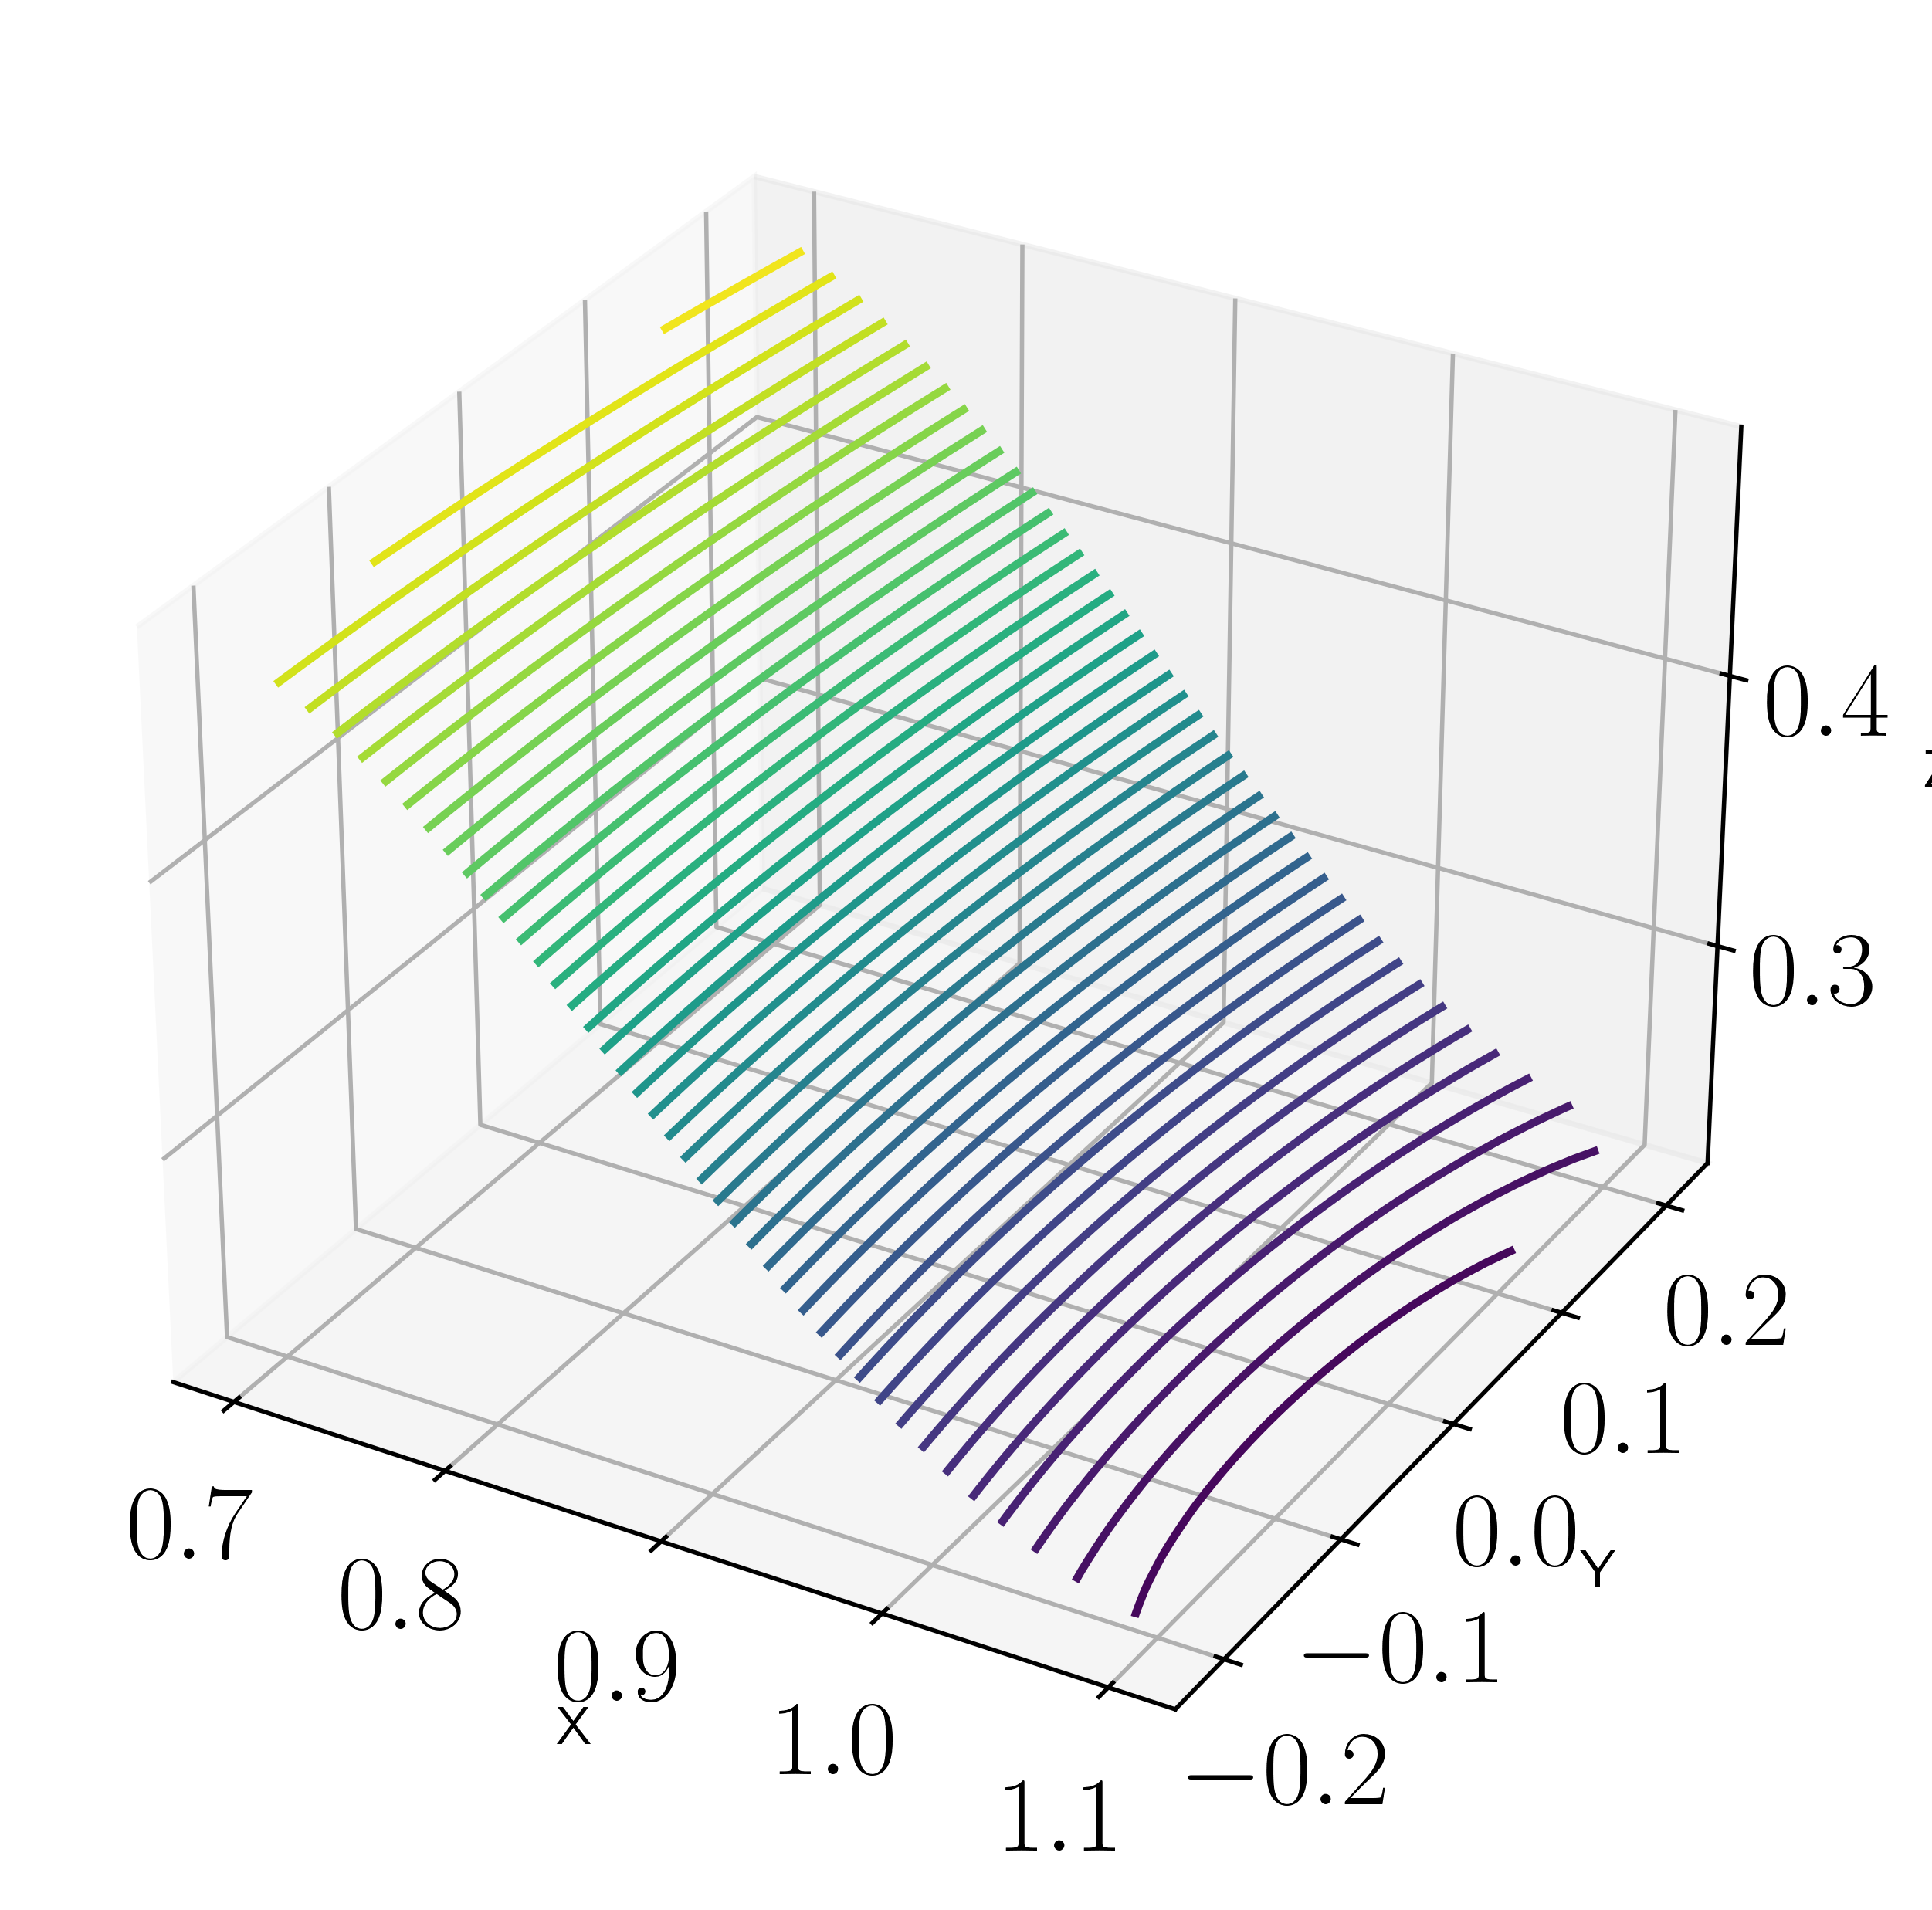

In [42]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# 3D contour plot
contours = ax.contour3D(CT,VEER, results, 50, cmap="viridis")
ax.clabel(contours, inline=False, fontsize=8)

# Labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# ax.view_init(elev=90, azim=120)

plt.show()

In [ ]:
CT = np.linspace(0.65,1.1,50)
VEER = np.array(-0.067)

results = np.zeros_like(CT)

for i in range(len(CT)):
    cot_trans   = scalars['scaler_cot_rotor'].transform(CT[i].reshape(-1, 1)).ravel()
    shear_trans = scalars['scaler_shears_rotor'].transform(np.array(0.0).reshape(-1, 1)).ravel()
    veer_trans  = scalars['scaler_veers_rotor'].transform(VEER.reshape(-1, 1)).ravel()

    inputs = np.column_stack([cot_trans, shear_trans, veer_trans])

    results[i] = scalars['scaler_ind_rotor'].inverse_transform(gpr_kernel.predict(inputs,return_std=False).reshape(-1, 1)).ravel() 

/tmp/ipykernel_2632628/3083050755.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results[i] = scalars['scaler_ind_rotor'].inverse_transform(gpr_kernel.predict(inputs,return_std=False).reshape(-1, 1)).ravel()
/tmp/ipykernel_2632628/3083050755.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results[i] = scalars['scaler_ind_rotor'].inverse_transform(gpr_kernel.predict(inputs,return_std=False).reshape(-1, 1)).ravel()
/tmp/ipykernel_2632628/3083050755.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performi

Text(0, 0.5, '$a')

Error in callback <function _draw_all_if_interactive at 0x1482f06df2e0> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'$a'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpg_1ubqwt 47963c0e4c0797b40d34604d35611d5c.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (TeX Live 2024) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./47963c0e4c0797b40d34604d35611d5c.tex
LaTeX2e <2024-11-01> patch level 1
L3 programming layer <2024-11-02>
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/base/article.cls
Document Class: article 2024/06/29 v1.4n Standard LaTeX document class
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/base/size10.clo))
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/cm-super/type1ec.sty
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/base/t1cmr.fd))
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/base/inputenc.sty)
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/geometry/geometry.sty
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/graphics/keyval.sty)
(/work2/09909/smata/stampede3/texmf-dist/tex/generic/iftex/ifvtex.sty
(/work2/09909/smata/stampede3/texmf-dist/tex/generic/iftex/iftex.sty)))
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/amsfonts/amsfonts.sty)
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/underscore/underscore.sty)
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
 (/work2/09909/smata/stampede3/texmf-dist/tex/latex/base/textcomp.sty)
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/l3backend/l3backend-dvips.de
f)
No file 47963c0e4c0797b40d34604d35611d5c.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Extra }, or forgotten $.
l.29 {\sffamily $a}
                   %
No pages of output.
Transcript written on tmpg_1ubqwt/47963c0e4c0797b40d34604d35611d5c.log.




RuntimeError: latex was not able to process the following string:
b'$a'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpg3288bhx 47963c0e4c0797b40d34604d35611d5c.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (TeX Live 2024) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./47963c0e4c0797b40d34604d35611d5c.tex
LaTeX2e <2024-11-01> patch level 1
L3 programming layer <2024-11-02>
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/base/article.cls
Document Class: article 2024/06/29 v1.4n Standard LaTeX document class
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/base/size10.clo))
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/cm-super/type1ec.sty
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/base/t1cmr.fd))
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/base/inputenc.sty)
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/geometry/geometry.sty
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/graphics/keyval.sty)
(/work2/09909/smata/stampede3/texmf-dist/tex/generic/iftex/ifvtex.sty
(/work2/09909/smata/stampede3/texmf-dist/tex/generic/iftex/iftex.sty)))
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/amsfonts/amsfonts.sty)
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/underscore/underscore.sty)
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
 (/work2/09909/smata/stampede3/texmf-dist/tex/latex/base/textcomp.sty)
(/work2/09909/smata/stampede3/texmf-dist/tex/latex/l3backend/l3backend-dvips.de
f)
No file 47963c0e4c0797b40d34604d35611d5c.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Extra }, or forgotten $.
l.29 {\sffamily $a}
                   %
No pages of output.
Transcript written on tmpg3288bhx/47963c0e4c0797b40d34604d35611d5c.log.




<Figure size 3200x2400 with 1 Axes>

Text(0.5, 0, '$a$')

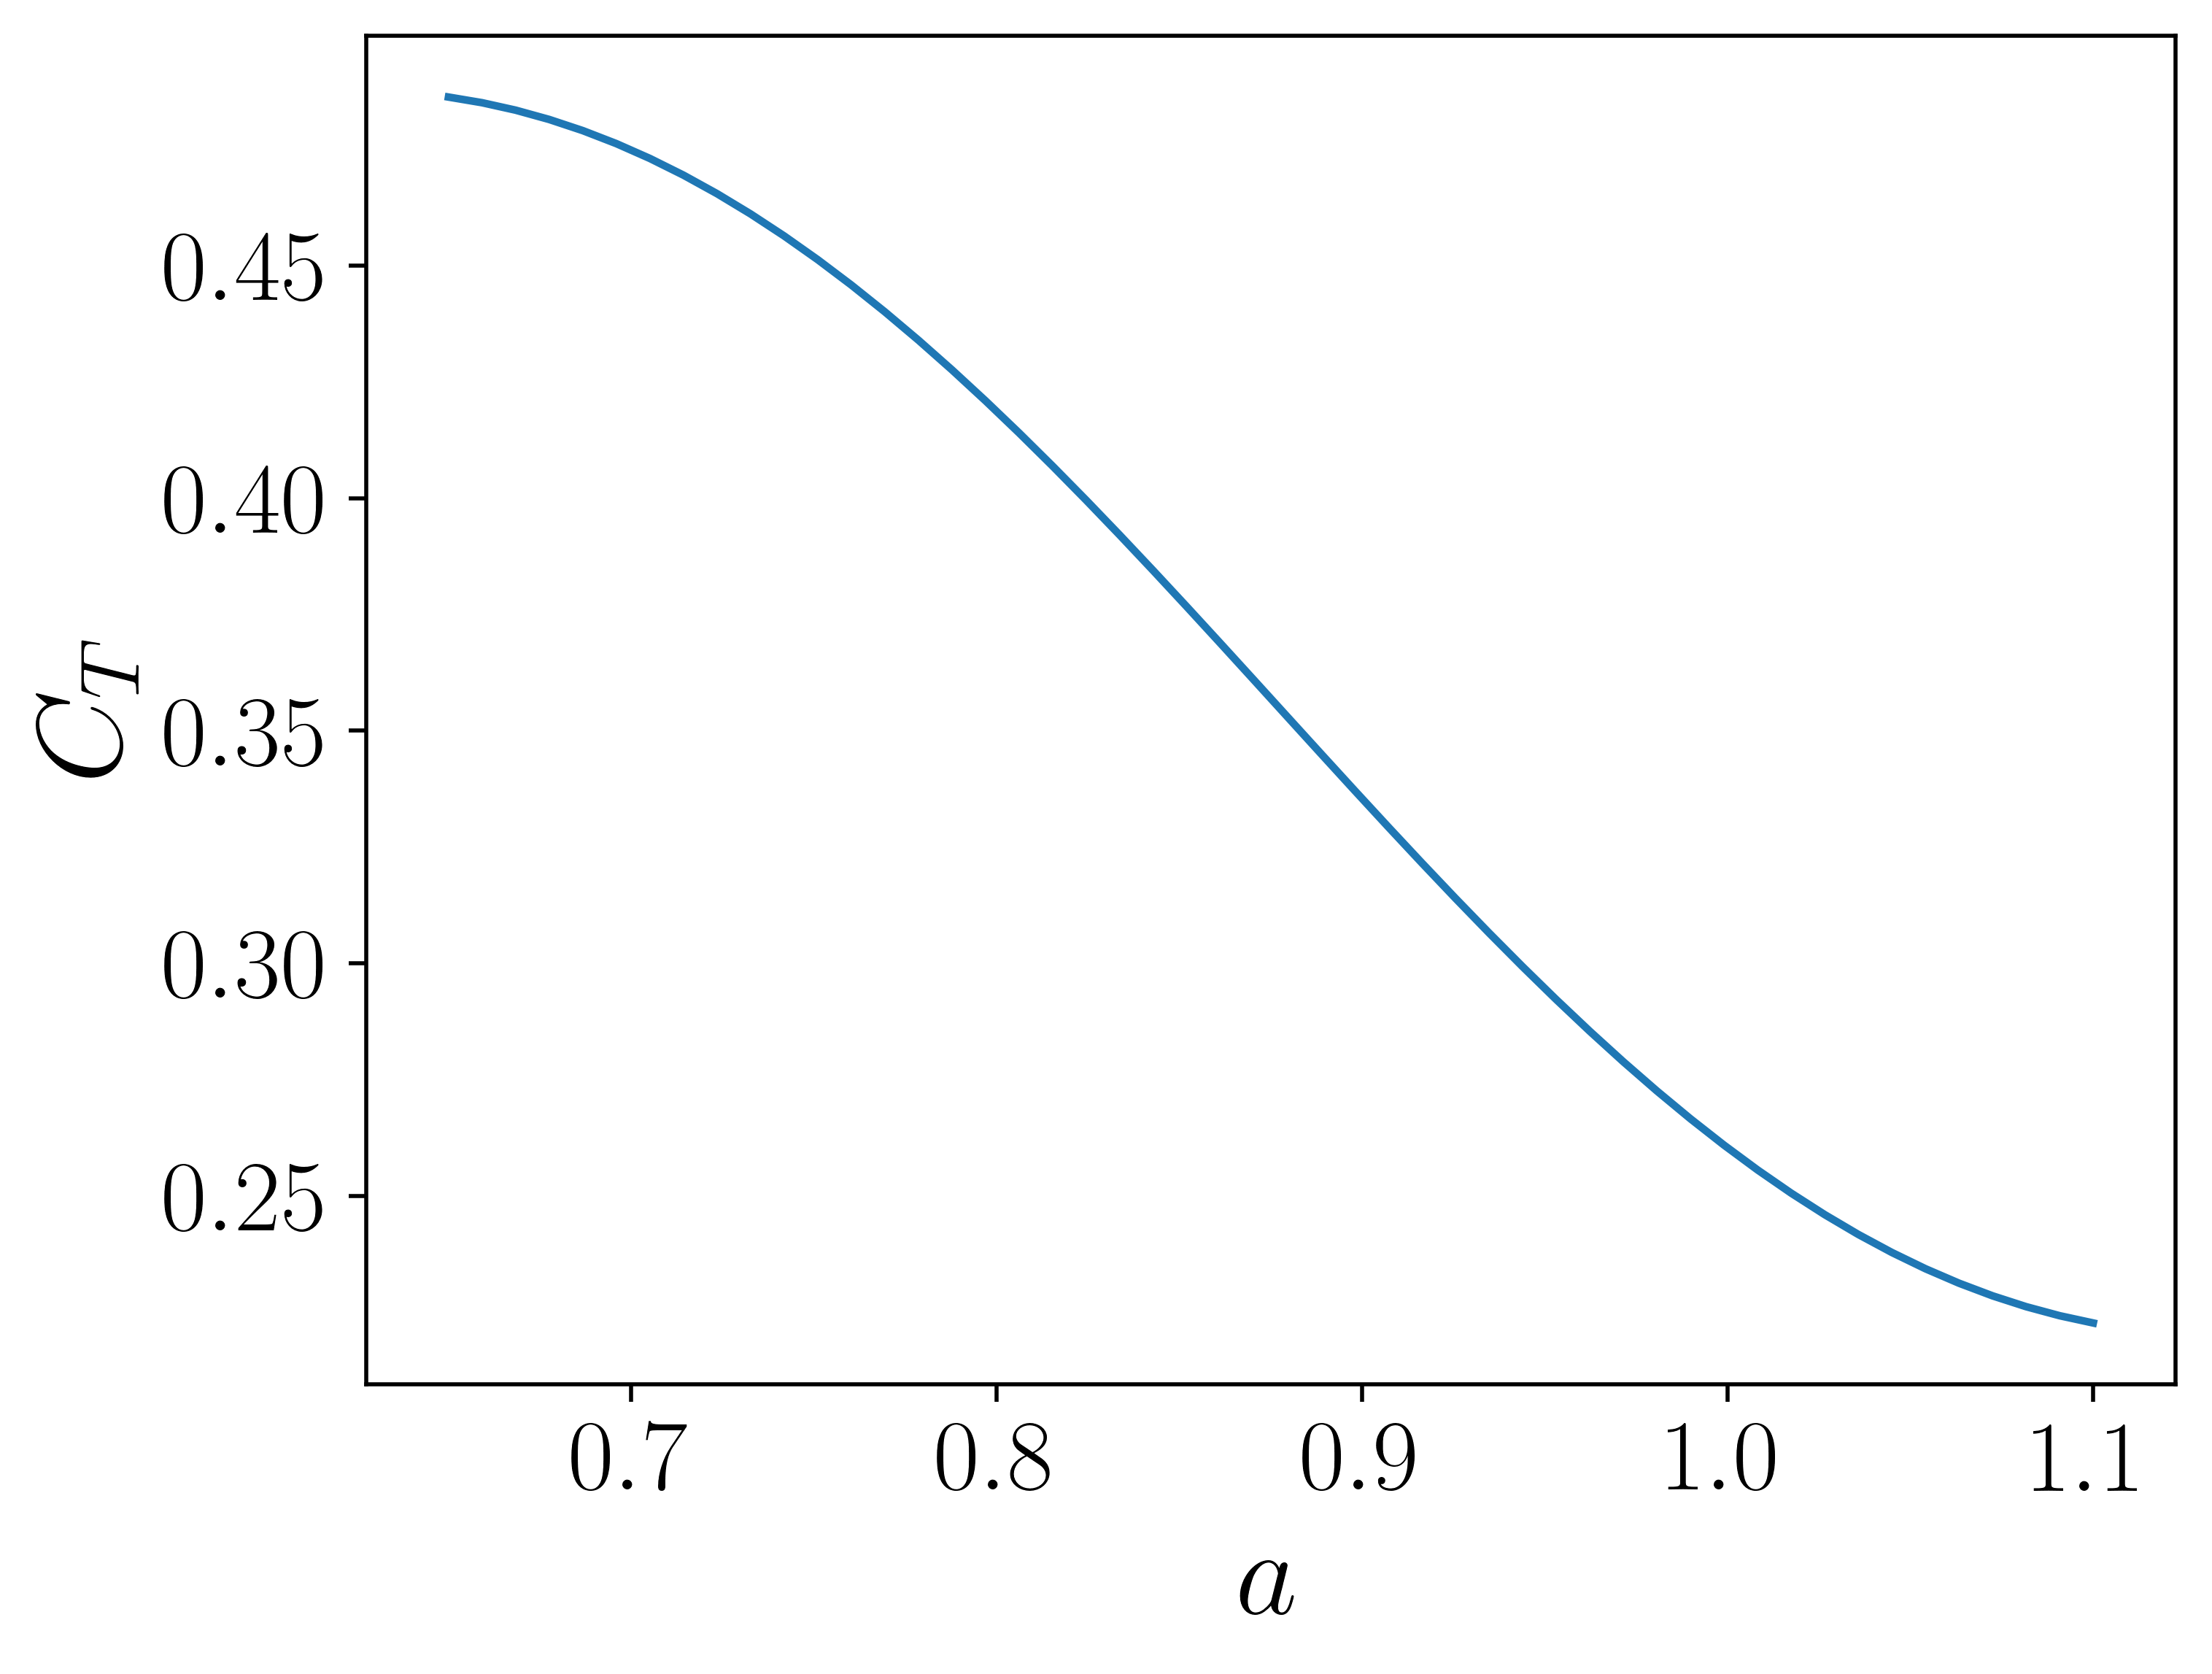

In [54]:
plt.plot(CT, results)

plt.ylabel('$C_T$', fontsize=fontsize)
plt.xlabel('$a$', fontsize=fontsize)

In [1]:
A_pred[14]

NameError: name 'A_pred' is not defined

In [60]:
# X_t_rot = scalars['scaler_cot_rotor'].inverse_transform(X_train[:,0].reshape(-1, 1)).ravel()
# y_t_rot = scalars['scaler_ind_rotor'].inverse_transform(y_train.reshape(-1, 1)).ravel()

X_t_rot = scalars['scaler_cot_rotor'].inverse_transform(X_test[:,0].reshape(-1, 1)).ravel()
y_t_rot = scalars['scaler_ind_rotor'].inverse_transform(y_test.reshape(-1, 1)).ravel()

In [65]:
X_t_rot[14]

np.float64(0.8880110626007323)

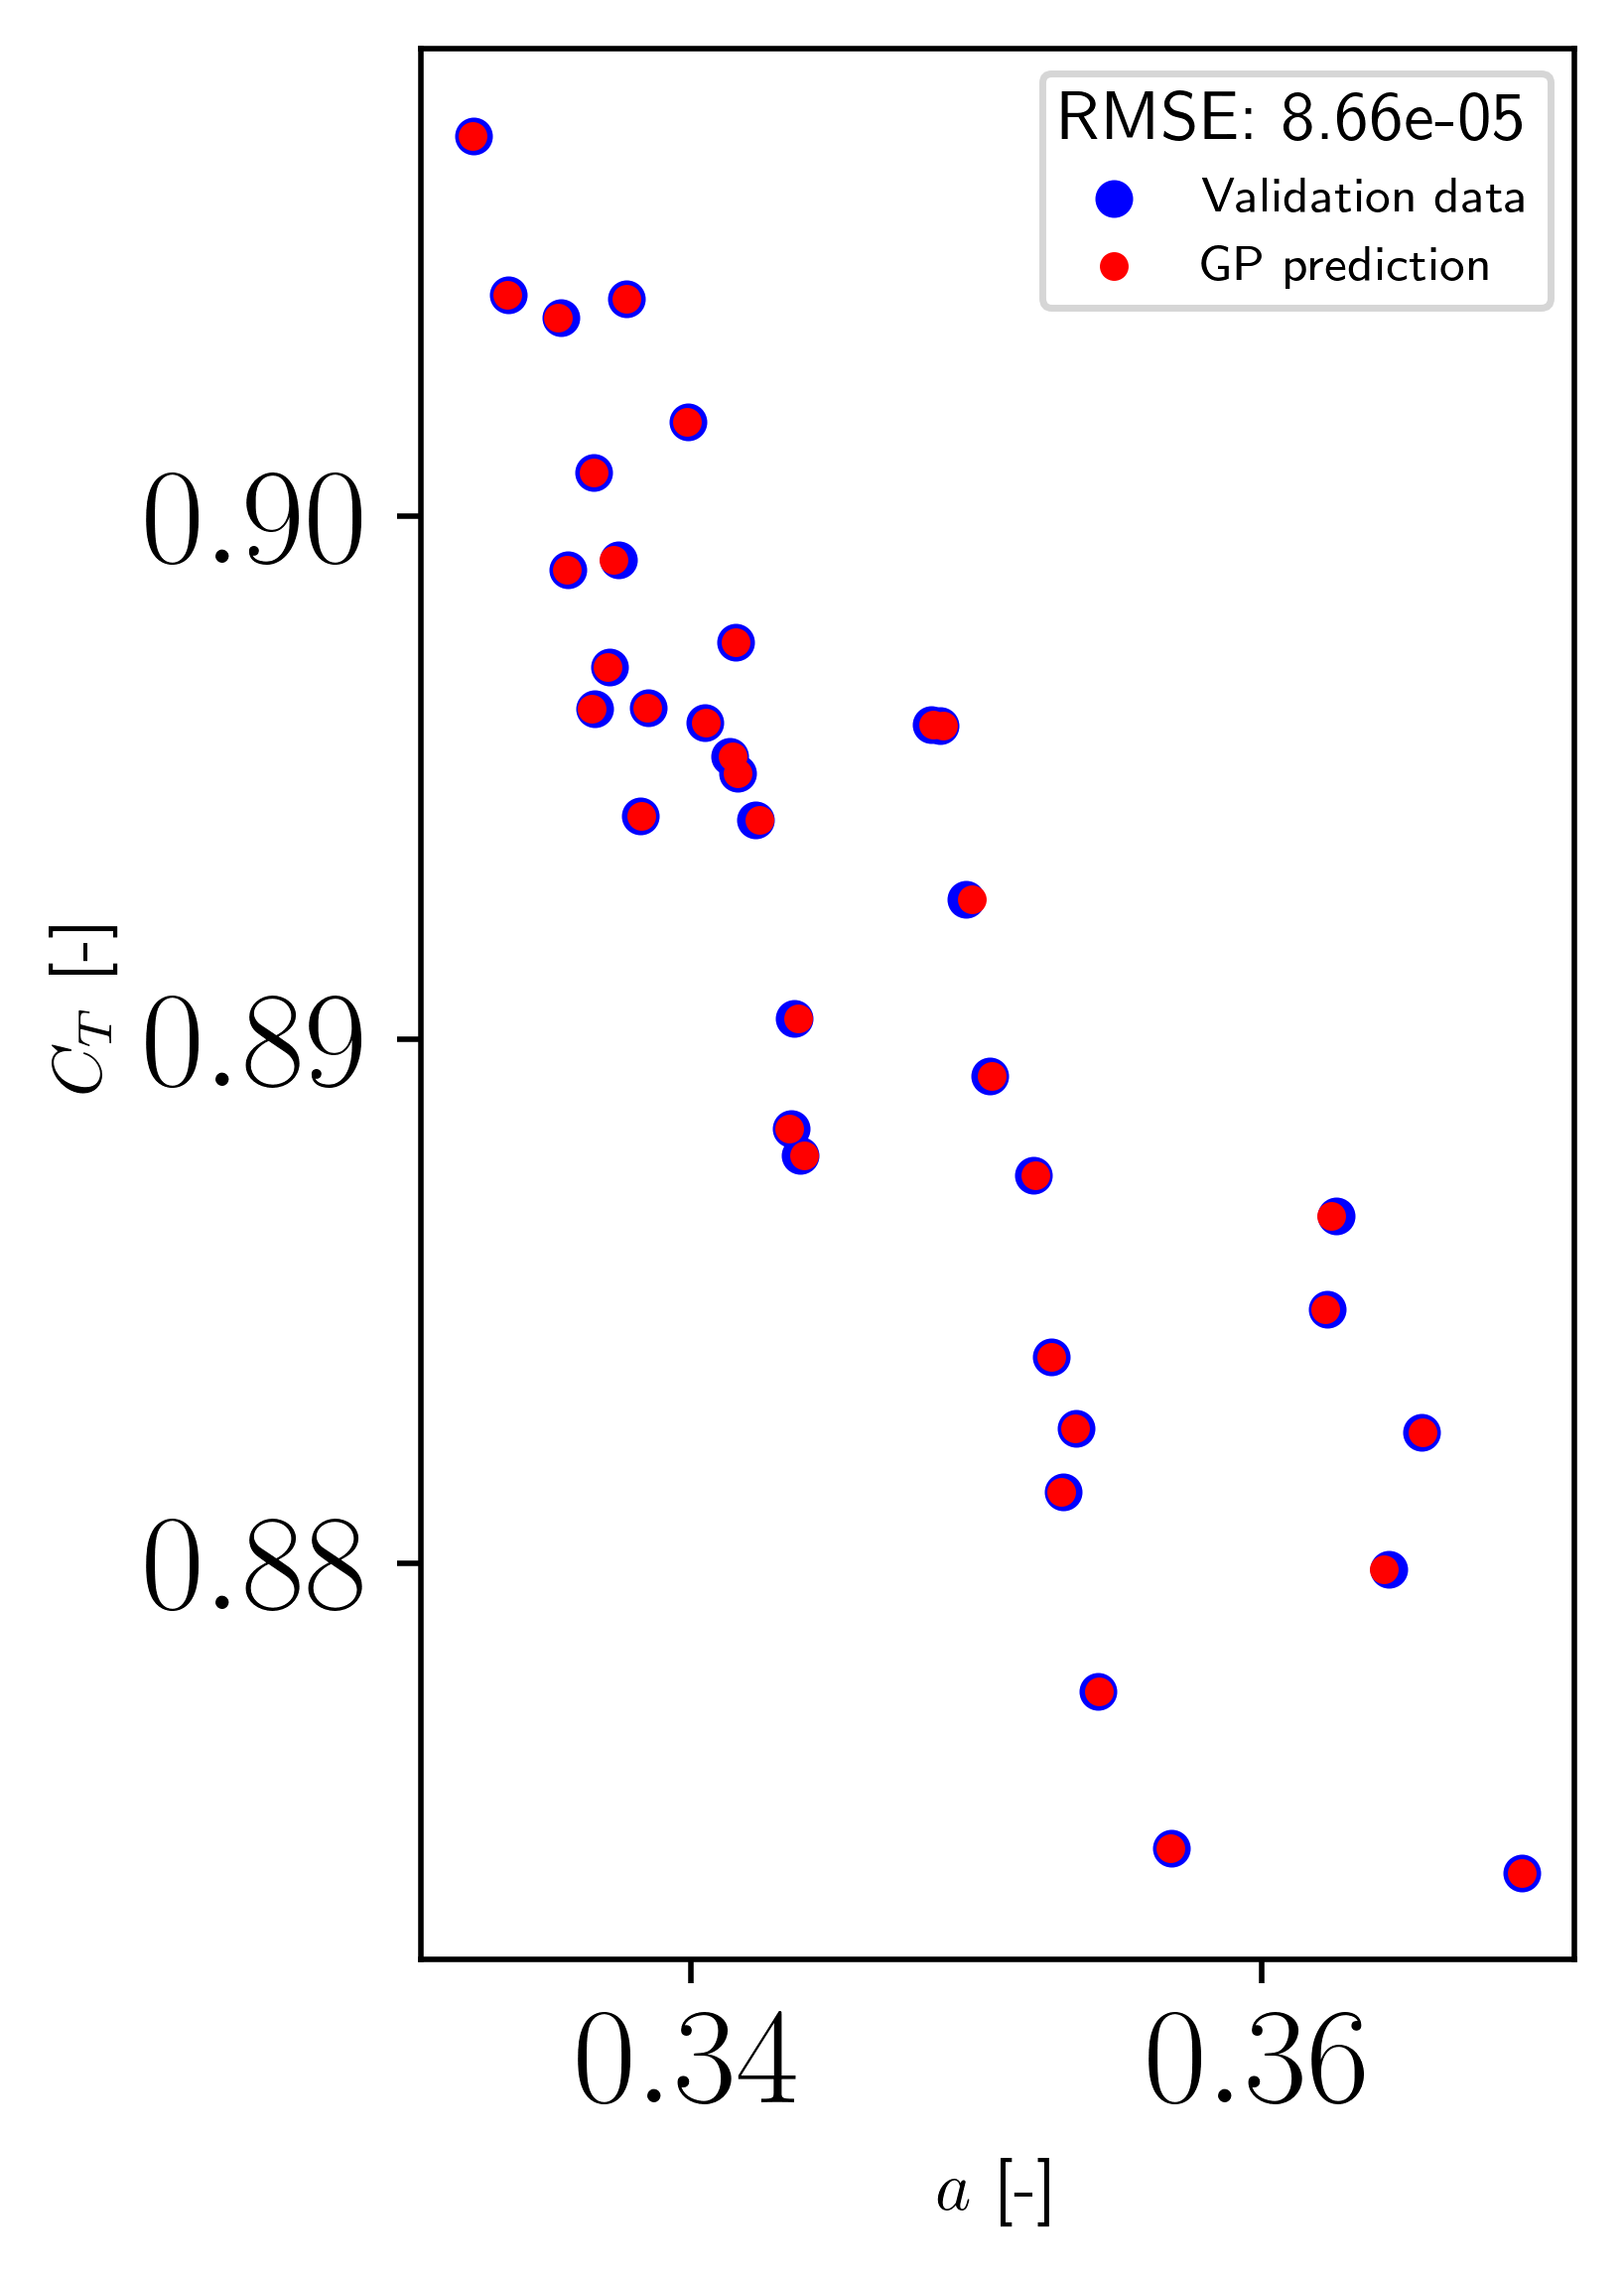

In [183]:
fig, ax = plt.subplots(figsize=(3, 5))

ax.scatter(y_t_rot,X_t_rot,20,color='b',label='Validation data')
ax.scatter(A_pred,X_t_rot,10,color='r',label='GP prediction')

rmse = np.sqrt(mean_squared_error(y_t_rot, A_pred))

# ax.set_xlim([0.2,0.35])
# ax.set_ylim([0.7,1.1])

ax.set_ylabel('$C_T$ [-]')
ax.set_xlabel('$a$ [-]')

ax.legend(fontsize=7, title=f"RMSE: {rmse:.2e}")

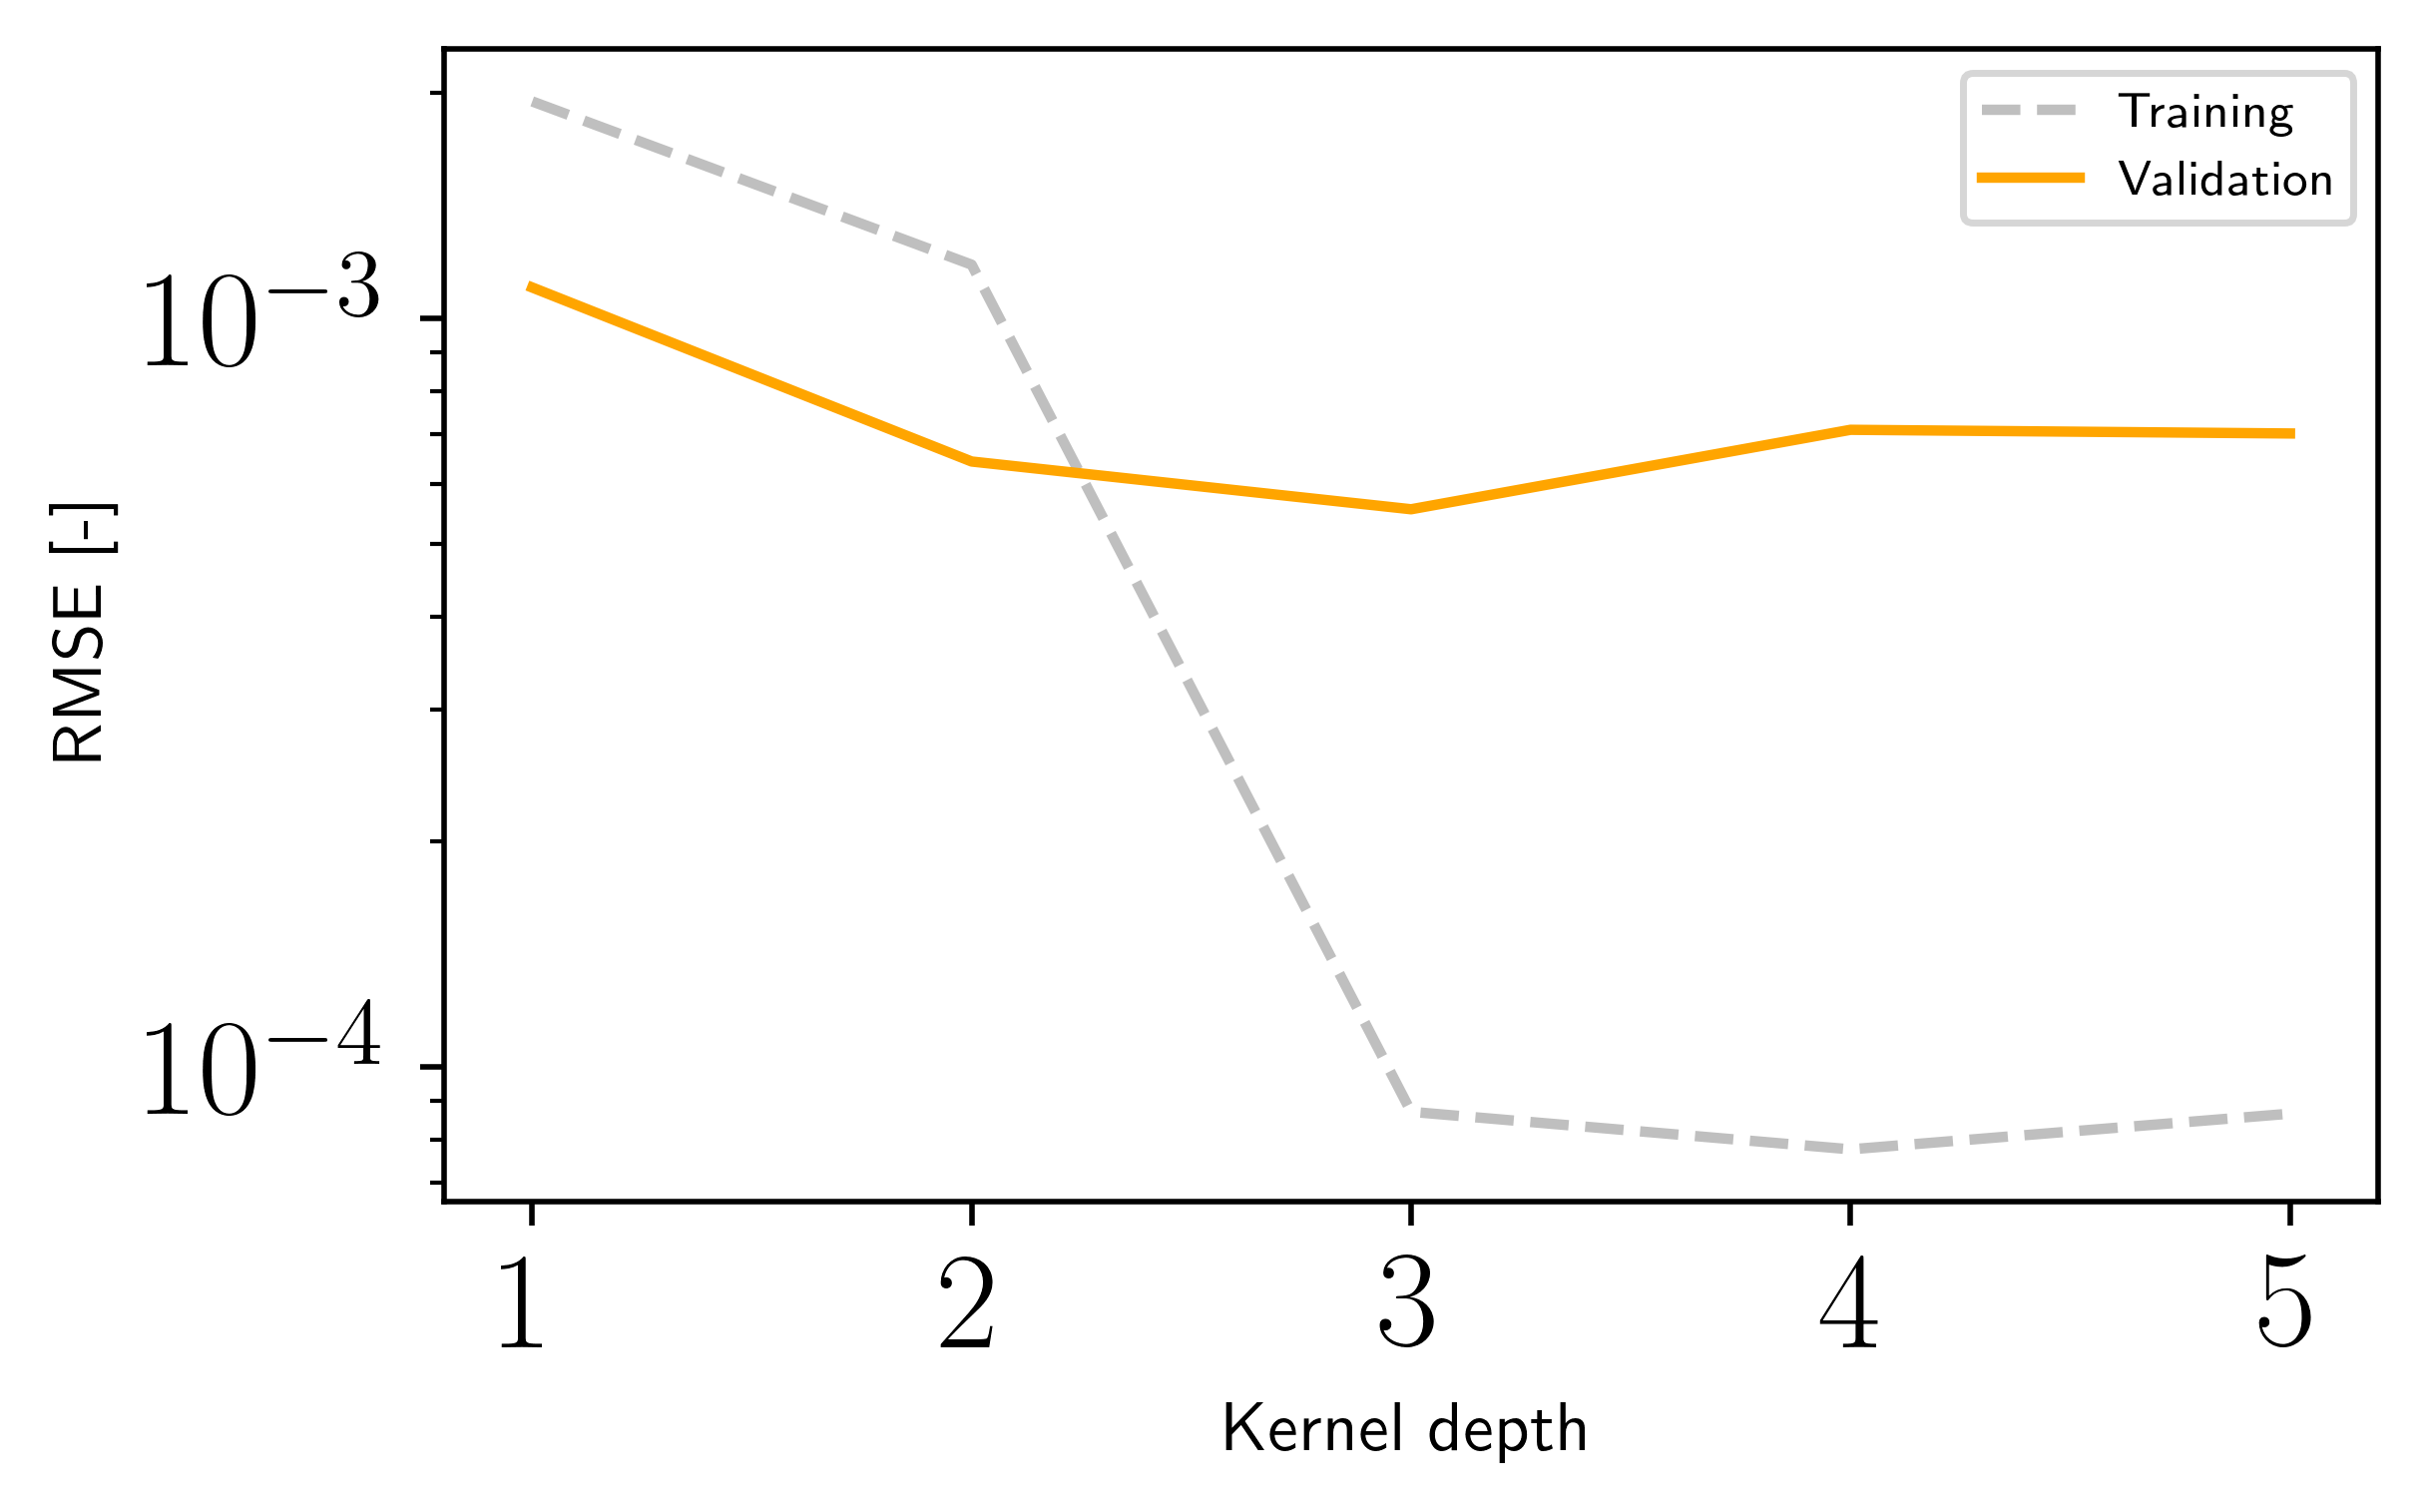

In [143]:
fig, ax = plt.subplots(figsize=(5, 3))

train    = [1.95e-3,1.18e-3,8.71e-5,7.76e-5,8.66e-5]
validate = [1.10e-3,6.44e-4,5.56e-4,7.10e-4,7.02e-4]

depth = [1, 2, 3, 4, 5] 

ax.semilogy(depth,train,linestyle='--',color='grey',label='Training',alpha=0.5)
ax.semilogy(depth,validate,color='orange',label='Validation')

ax.set_ylabel('RMSE [-]')
ax.set_xlabel('Kernel depth')

ax.set_xticks(depth)

ax.legend(fontsize = 7)
plt.show()

In [213]:
# train_indices = [14,15,16,17,18,19,20]
validate_indices = [7,8,9,10,11,12,13]
# A_pred[train_indices].T - y_t_rot[train_indices]
A_pred[validate_indices].T - y_t_rot[validate_indices]

array([[ 9.19549911e-05,  2.22419377e-05, -1.11419332e-04,
        -1.91978683e-04, -1.20392511e-04,  9.41737505e-06,
         5.98551134e-05]])

In [215]:
train_D1 = [-0.00030334, -0.00076712, -0.00121834, -0.00105352, -0.00034395, 0.00054115,  0.00081222]
train_D2 = [ 0.00180232, -0.00013488, -0.00128796, -0.00158498, -0.00109471, 0.00010859,  0.00194765]
train_D3 = [-1.39793764e-04,  6.78021851e-05,  3.22731275e-05, -2.01676838e-05,  3.89952732e-05,  1.20002752e-04, -1.14831469e-04]
train_D4 = [-4.90688456e-05,  8.26644070e-05, -3.55207674e-05, -1.37468862e-04,  5.76630169e-06,  1.94517029e-04, -4.90069204e-05]
train_D5 = [-5.45542865e-05,  1.09909293e-04, -3.25071977e-05, -1.59746385e-04, -7.79011174e-06,  2.03062087e-04, -4.60859052e-05]

In [216]:
validate_D1 = [-7.25197070e-04, -9.52565436e-04, -1.06614268e-03, -8.75589674e-04, -4.81873692e-04,  2.34054809e-05, 3.25877006e-04]
validate_D2 = [ 5.81955129e-04, -2.86692911e-04, -7.82485561e-04, -8.41433667e-04, -5.74108641e-04,  4.80028758e-05, 9.32769521e-04]
validate_D3 = [1.11178583e-04, 1.13260085e-04, 5.01927764e-05, 1.08380328e-05, 4.61809482e-05, 1.10473163e-04, 1.08703395e-04]
validate_D4 = [ 5.95183668e-05, -6.87642380e-06, -1.16295210e-04, -1.81168638e-04, -1.16155104e-04, -7.64106117e-06, 3.17035139e-05]
validate_D5 = [ 9.19549911e-05,  2.22419377e-05, -1.11419332e-04, -1.91978683e-04, -1.20392511e-04,  9.41737505e-06, 5.98551134e-05]

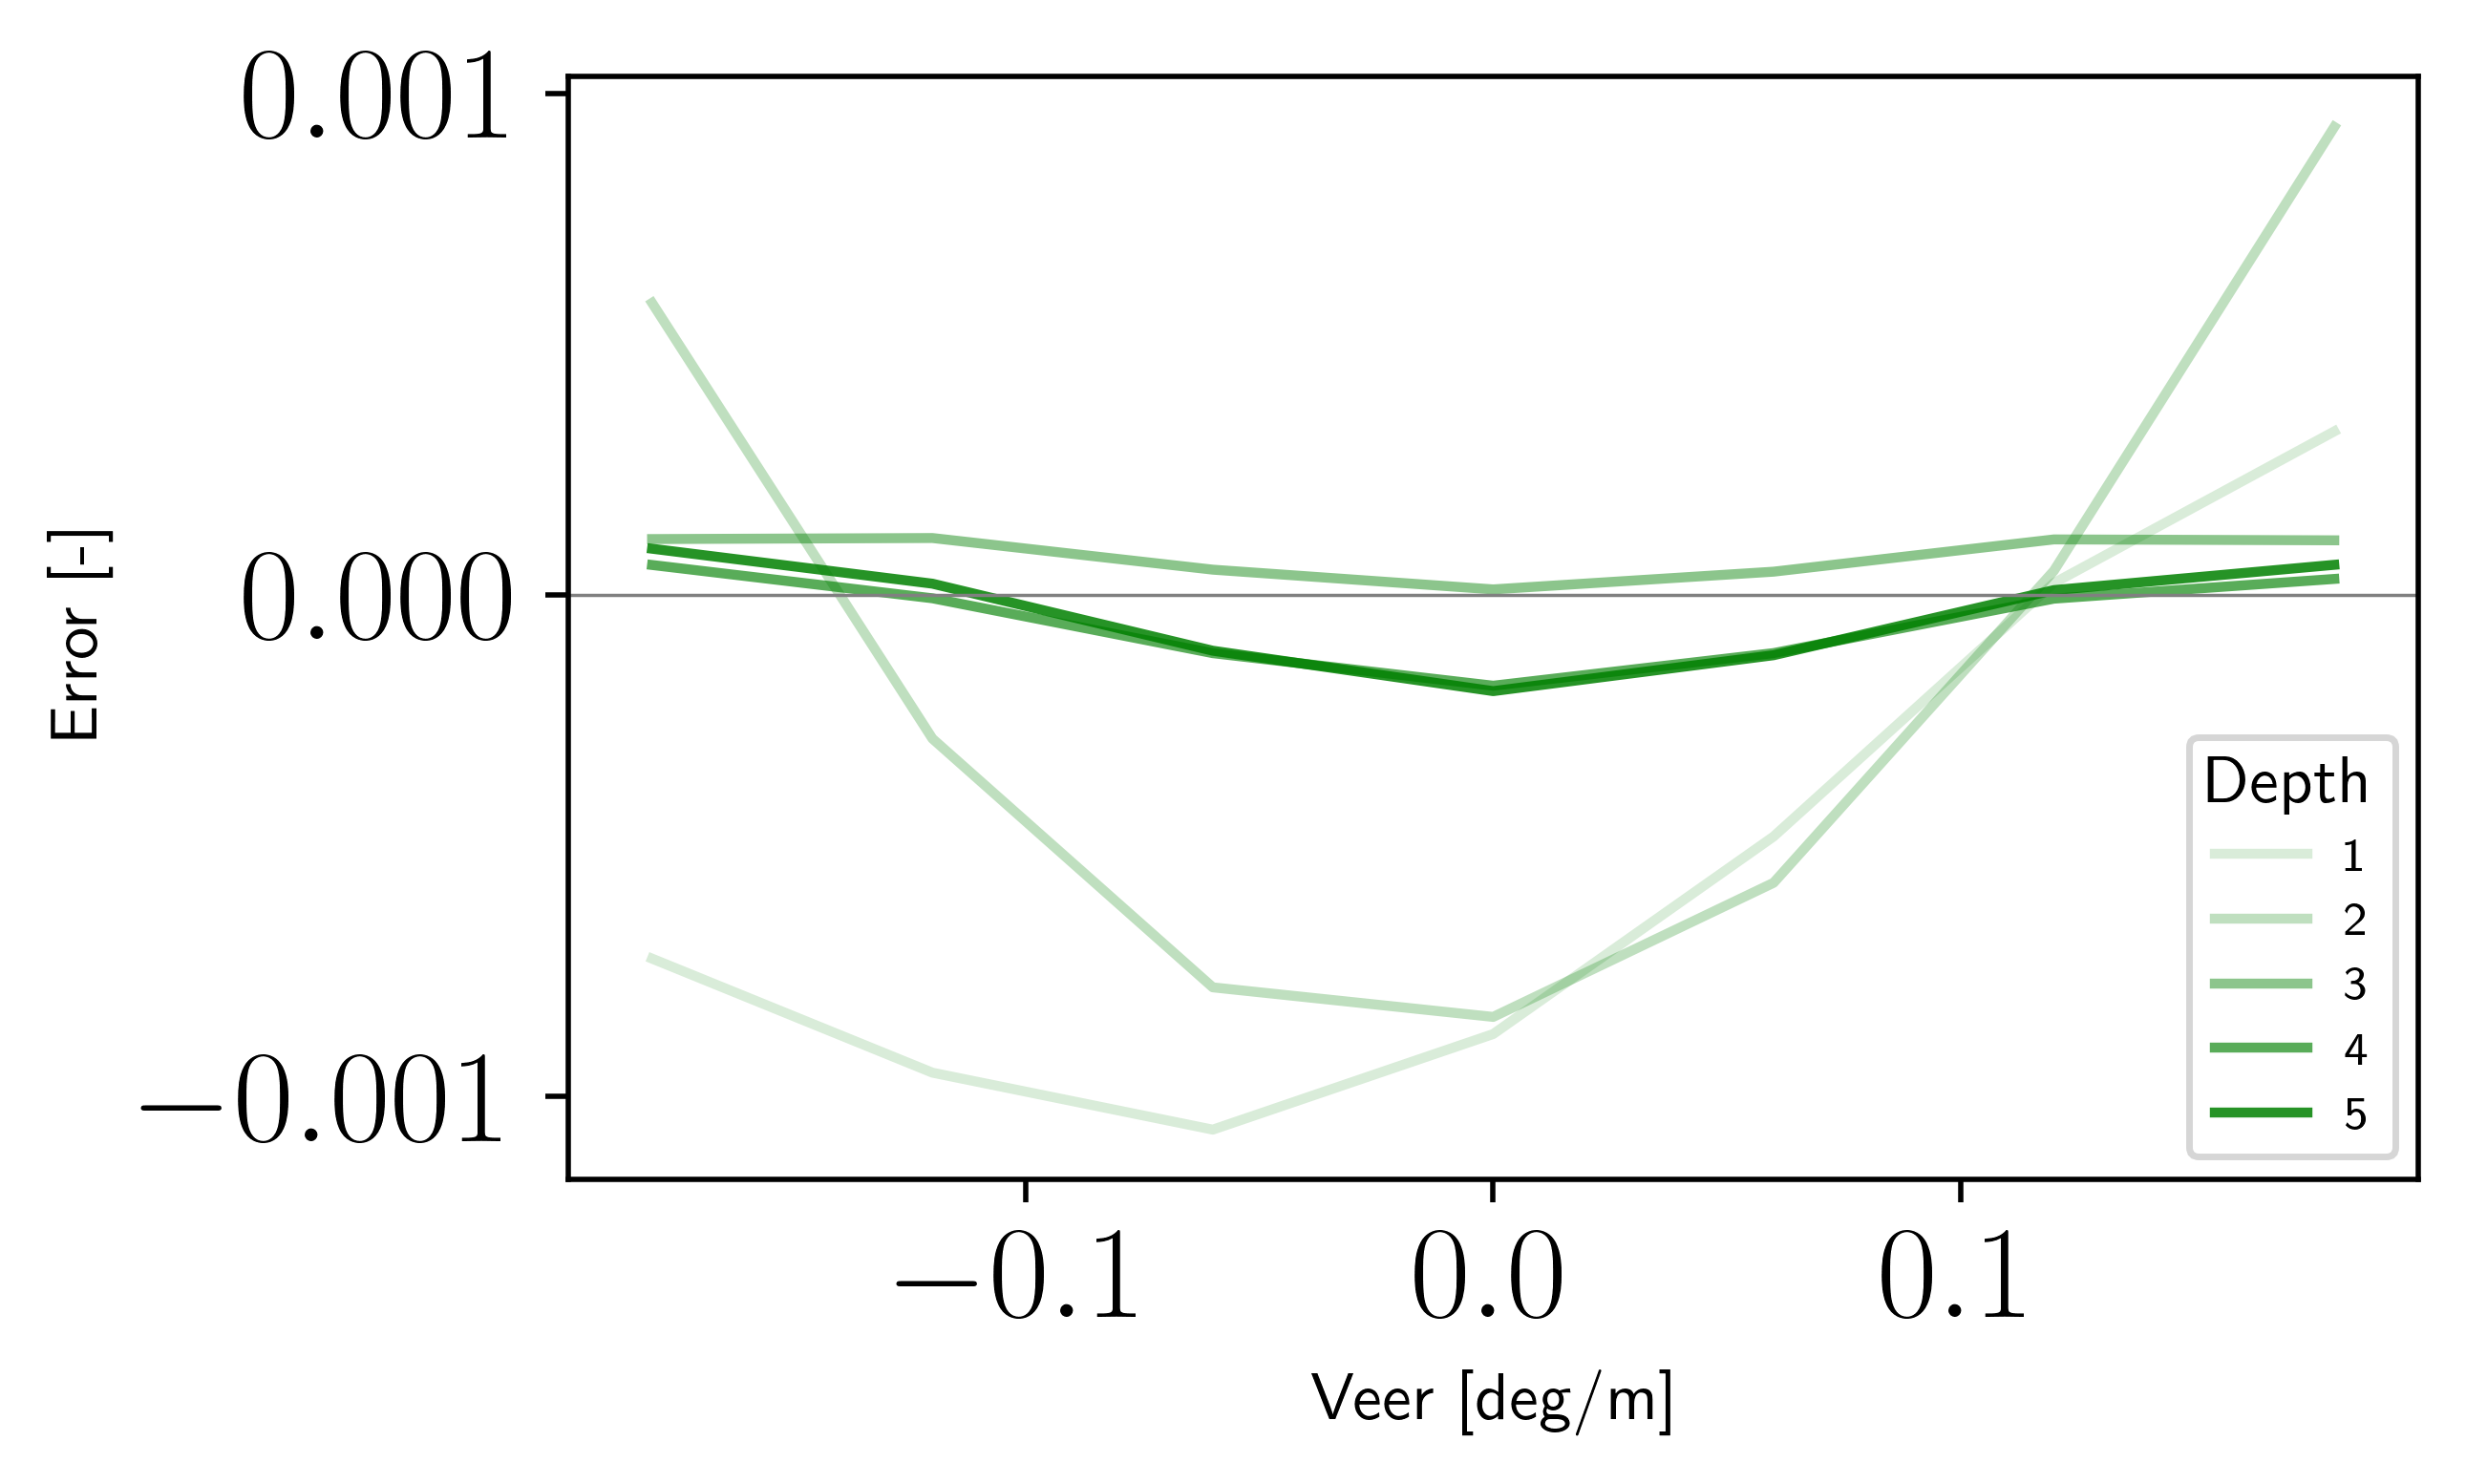

In [227]:
fig, ax = plt.subplots(figsize=(5, 3))


veer_train = [-0.2,-0.13,-0.067,0.0,0.067,0.13,0.2] 
veer_validate = [-0.18,-0.12,-0.06,0.0,0.06,0.12,0.18] 

# ax.plot(veer_train,train_D1,linestyle='-',linewidth=0.5,color='grey',alpha=0.15)
# ax.plot(veer_train,train_D2,linestyle='-',linewidth=0.5,color='grey',alpha=0.25)
# ax.plot(veer_train,train_D3,linestyle='-',linewidth=0.5,color='grey',alpha=0.45)
# ax.plot(veer_train,train_D4,linestyle='-',linewidth=0.5,color='grey',alpha=0.65)
# ax.plot(veer_train,train_D5,linestyle='-',linewidth=0.5,color='grey',alpha=0.85)

ax.plot(veer_validate,validate_D1,linestyle='-',color='green',label='1',alpha=0.15)
ax.plot(veer_validate,validate_D2,linestyle='-',color='green',label='2',alpha=0.25)
ax.plot(veer_validate,validate_D3,linestyle='-',color='green',label='3',alpha=0.45)
ax.plot(veer_validate,validate_D4,linestyle='-',color='green',label='4',alpha=0.65)
ax.plot(veer_validate,validate_D5,linestyle='-',color='green',label='5',alpha=0.85)

# ax.semilogy(veer_validate,validate,color='orange',label='Validation')

ax.axhline(0, color='grey', linestyle='-', linewidth=0.5)  # horizontal dashed grey line


ax.set_ylabel('Error [-]')
ax.set_xlabel('Veer [deg/m]')

# ax.set_xticks(depth)

ax.legend(title='Depth',fontsize = 7)
plt.show()

In [33]:
train_data['cot_rotor']

array([0.87455624, 0.88830019, 0.89632179, 0.89898078, 0.89541036,
       0.88741076, 0.87407765, 0.87755464, 0.88779596, 0.89426988,
       0.89711278, 0.89509043, 0.88930171, 0.87988423, 0.88135055,
       0.89040513, 0.89634211, 0.89916217, 0.89758297, 0.89268261,
       0.88485621, 0.88394195, 0.89420616, 0.90083478, 0.90380007,
       0.90180154, 0.89599052, 0.88662617, 0.882568  , 0.89605987,
       0.90423747, 0.9072643 , 0.9041588 , 0.89602435, 0.8824972 ])

In [34]:
train_data['ind_rotor']

array([0.35683251, 0.34349286, 0.3366228 , 0.3356668 , 0.34136418,
       0.35198861, 0.36914271, 0.35427669, 0.34383019, 0.33822299,
       0.33713891, 0.34161303, 0.35046555, 0.36445523, 0.35304437,
       0.34362809, 0.33848581, 0.33744342, 0.34156468, 0.34965288,
       0.36229626, 0.35264167, 0.34225282, 0.33657452, 0.33542363,
       0.339877  , 0.34871857, 0.36261344, 0.35351821, 0.34049724,
       0.33357956, 0.33237988, 0.33771758, 0.34840539, 0.3656279 ])